#**Problem Statement**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

#**Business Goal** 

we have to make a model on the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# **Data Loading**

In [ ]:
house_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/upgrade/Untitled folder/train (1).csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Shape of the Dataset(no. of dataset and no. of feature)

In [ ]:
house_data.shape

(1460, 81)


**Observation**
*   There are total 1460 nos of dataset and all data have 81 features




# Summary of the dataset:

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **EDA**

### **Separating the Feature as per the datatype**

In [ ]:
numerical_features = [feature for feature in house_data.columns if house_data[feature].dtypes != 'O']
temporal_features = [feature for feature in house_data.columns if 'Yr' in feature or 'Year' in feature ]
numerical_features = list(set(numerical_features) - set(temporal_features))
catagorical_features=[feature for feature in house_data.columns if house_data[feature].dtypes =='O']

print('Number of numerical variables: ', len(numerical_features))
print('Number of temporal variables: ', len(temporal_features))
print('Number of catagorical variables: ', len(catagorical_features))

Number of numerical variables:  34
Number of temporal variables:  4
Number of catagorical variables:  43


**Observation**
*   There are total 34 nos of numerical variables 4 nos of temporal variables and 43 nos of catagorical variables

In [ ]:
numerical_features.remove('Id')

In [ ]:
len(numerical_features)

33

### **Analysis on Numerical Features**

In [ ]:
house_data_numarical=house_data[numerical_features]

In [ ]:
house_data_numarical.shape

(1460, 33)

### Identifying the missing values present in numeric data

In [ ]:
for i in house_data_numarical.columns:
  print("{}% Percentage of missing values in the feature {}".format((house_data_numarical[i].isnull().sum()/house_data_numarical.shape[0])*100,i))

0.0% Percentage of missing values in the feature LotArea
0.0% Percentage of missing values in the feature LowQualFinSF
0.0% Percentage of missing values in the feature OverallCond
0.0% Percentage of missing values in the feature FullBath
0.0% Percentage of missing values in the feature WoodDeckSF
0.0% Percentage of missing values in the feature PoolArea
0.0% Percentage of missing values in the feature BsmtUnfSF
0.0% Percentage of missing values in the feature MiscVal
0.0% Percentage of missing values in the feature BsmtFinSF1
0.0% Percentage of missing values in the feature BsmtFinSF2
0.547945205479452% Percentage of missing values in the feature MasVnrArea
0.0% Percentage of missing values in the feature BedroomAbvGr
0.0% Percentage of missing values in the feature TotRmsAbvGrd
0.0% Percentage of missing values in the feature 2ndFlrSF
0.0% Percentage of missing values in the feature ScreenPorch
0.0% Percentage of missing values in the feature HalfBath
0.0% Percentage of missing values

**Observation**
*   There is two numerical variables named 'LotFrontage' and 'MasVnrArea'have missing values and the percentage are 17.7395% and 0.547% simultaneously

### Finding outliers

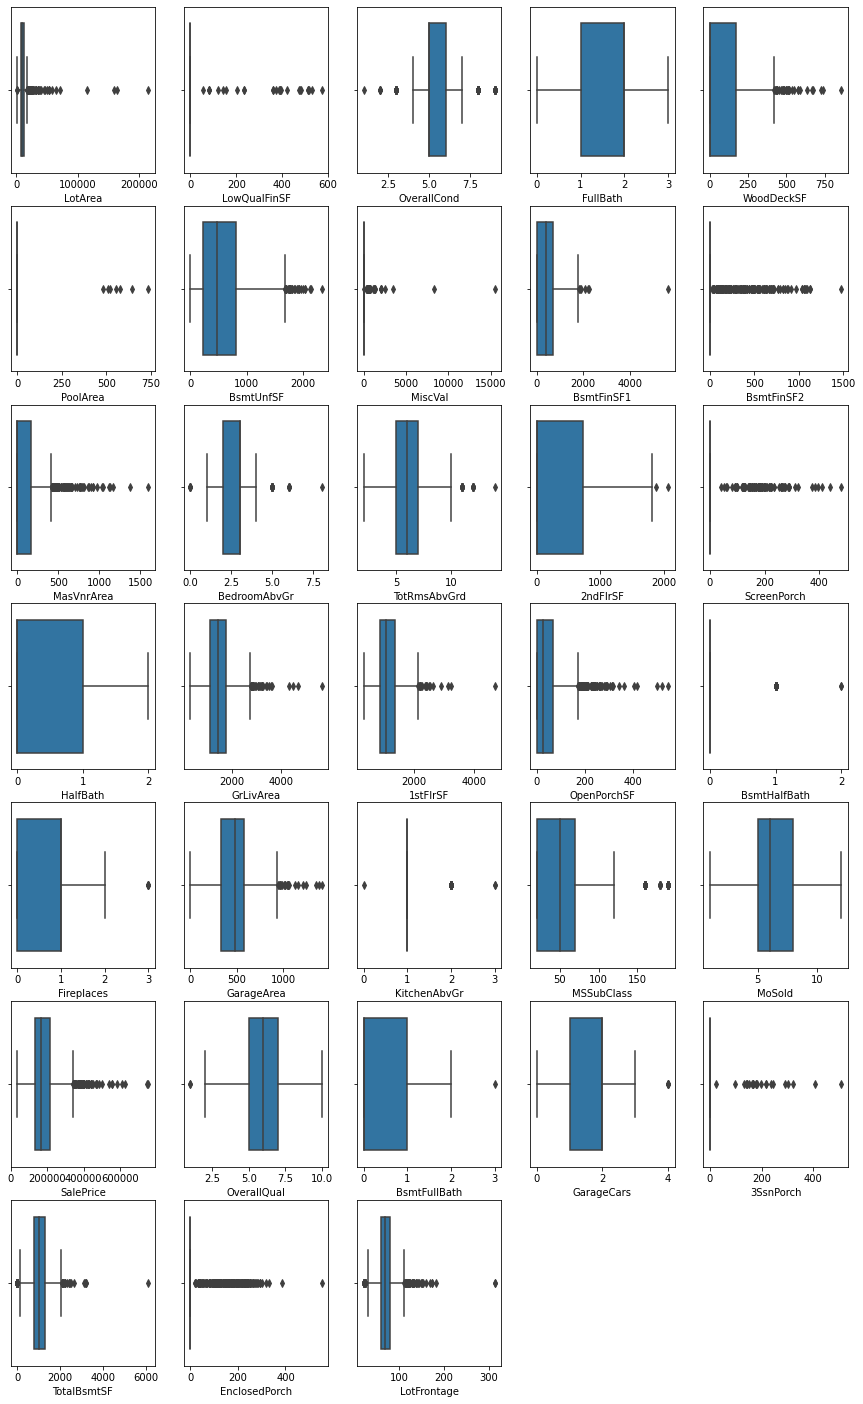

In [ ]:
plt.figure(figsize=(15,25))
for i,v in enumerate(list(house_data_numarical.columns)):
  plt.subplot(7,5,i+1)
  sns.boxplot(house_data_numarical[v])
plt.show()

**Observation**
*   From the above analysis we can conclude, the outliers are there in the numeric features . we need more analysis to conclude in detail

### Percentile analysis of numeric variables

In [ ]:
house_data_numarical.describe()

,LotArea,LowQualFinSF,OverallCond,FullBath,WoodDeckSF,PoolArea,BsmtUnfSF,MiscVal,BsmtFinSF1,BsmtFinSF2,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,2ndFlrSF,ScreenPorch,HalfBath,GrLivArea,1stFlrSF,OpenPorchSF,BsmtHalfBath,Fireplaces,GarageArea,KitchenAbvGr,MSSubClass,MoSold,SalePrice,OverallQual,BsmtFullBath,GarageCars,3SsnPorch,TotalBsmtSF,EnclosedPorch,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,10516.828082,5.844521,5.575342,1.565068,94.244521,2.758904,567.240411,43.489041,443.639726,46.549315,103.685262,2.866438,6.517808,346.992466,15.060959,0.382877,1515.463699,1162.626712,46.660274,0.057534,0.613014,472.980137,1.046575,56.897260,6.321918,180921.195890,6.099315,0.425342,1.767123,3.409589,1057.429452,21.954110,70.049958
std,9981.264932,48.623081,1.112799,0.550916,125.338794,40.177307,441.866955,496.123024,456.098091,161.319273,181.066207,0.815778,1.625393,436.528436,55.757415,0.502885,525.480383,386.587738,66.256028,0.238753,0.644666,213.804841,0.220338,42.300571,2.703626,79442.502883,1.382997,0.518911,0.747315,29.317331,438.705324,61.119149,24.284752
min,1300.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000,34900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,7553.500000,0.000000,5.000000,1.000000,0.000000,0.000000,223.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1129.500000,882.000000,0.000000,0.000000,0.000000,334.500000,1.000000,20.000000,5.000000,129975.000000,5.000000,0.000000,1.000000,0.000000,795.750000,0.000000,59.000000
50%,9478.500000,0.000000,5.000000,2.000000,0.000000,0.000000,477.500000,0.000000,383.500000,0.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,1464.000000,1087.000000,25.000000,0.000000,1.000000,480.000000,1.000000,50.000000,6.000000,163000.000000,6.000000,0.000000,2.000000,0.000000,991.500000,0.000000,69.000000
75%,11601.500000,0.000000,6.000000,2.000000,168.000000,0.000000,808.000000,0.000000,712.250000,0.000000,166.000000,3.000000,7.000000,728.000000,0.000000,1.000000,1776.750000,1391.250000,68.000000,0.000000,1.000000,576.000000,1.000000,70.000000,8.000000,214000.000000,7.000000,1.000000,2.000000,0.000000,1298.250000,0.000000,80.000000
max,215245.000000,572.000000,9.000000,3.000000,857.000000,738.000000,2336.000000,15500.000000,5644.000000,1474.000000,1600.000000,8.000000,14.000000,2065.000000,480.000000,2.000000,5642.000000,4692.000000,547.000000,2.000000,3.000000,1418.000000,3.000000,190.000000,12.000000,755000.000000,10.000000,3.000000,4.000000,508.000000,6110.000000,552.000000,313.000000


In [ ]:
def outlier(df,f):
  percentile_25= np.percentile(df[f].values ,25)
  percentile_75= np.percentile(df[f].values ,75)

  IQR=(percentile_75-percentile_25)
  lower=percentile_25-(1.5*IQR)
  upper=percentile_75+(1.5*IQR)

  outleir =df[f][(df[f]<lower) | (df[f]>upper)]

  return round((outleir.shape[0]/df.shape[0])*100,3)

In [ ]:
#Percentage of outlier present in the dataset

for i in list(house_data_numarical.columns):
  print('{}% outlier are present in {}'.format(outlier(house_data_numarical,i),i))

4.726% outlier are present in LotArea
1.781% outlier are present in LowQualFinSF
8.562% outlier are present in OverallCond
0.0% outlier are present in FullBath
2.192% outlier are present in WoodDeckSF
0.479% outlier are present in PoolArea
1.986% outlier are present in BsmtUnfSF
3.562% outlier are present in MiscVal
0.479% outlier are present in BsmtFinSF1
11.438% outlier are present in BsmtFinSF2
0.0% outlier are present in MasVnrArea
2.397% outlier are present in BedroomAbvGr
2.055% outlier are present in TotRmsAbvGrd
0.137% outlier are present in 2ndFlrSF
7.945% outlier are present in ScreenPorch
0.0% outlier are present in HalfBath
2.123% outlier are present in GrLivArea
1.37% outlier are present in 1stFlrSF
5.274% outlier are present in OpenPorchSF
5.616% outlier are present in BsmtHalfBath
0.342% outlier are present in Fireplaces
1.438% outlier are present in GarageArea
4.658% outlier are present in KitchenAbvGr
7.055% outlier are present in MSSubClass
0.0% outlier are present in

**Observation**
*   From the above analysis we can conclude, the maximum outliers present in the features 'EnclosedPorch' and 'BsmtFinSF2' and there is no outlier present in features 'MoSold','HalfBath' ,'MasVnrArea' and 'LotFrontage'

### Analysis of Target Variable

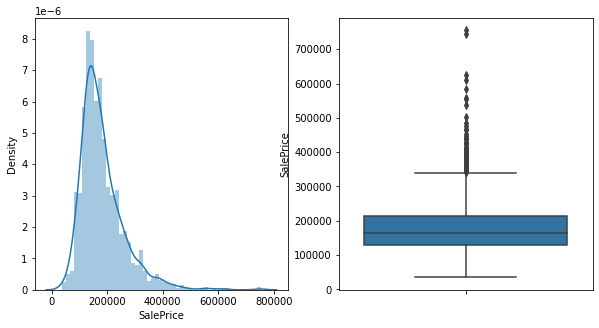

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(house_data_numarical['SalePrice'], ax=axes[0])


sns.boxplot(y=house_data_numarical['SalePrice'],ax=axes[1])
plt.show()

**Observation**
*   From the above analysis we can conclude, the target variable is not normaly distributed and the outliers are also present in the datasset (4.178%)

### Checking the distribution of the Target variable

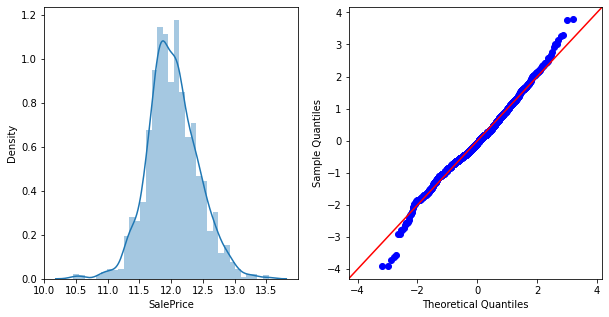

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(np.log(house_data_numarical['SalePrice']), ax=axes[0])


sm.qqplot(np.log(house_data_numarical['SalePrice']),line='45',fit=True,dist=stats.norm,ax=axes[1])
plt.show()

**Observation**
*   From the above analysis we can conclude, the distribution of target feature is log-normal . 

*   We need to check the distribution of the other features with target feature as well. If the distributions are not normal, them we need to do some feature engineering to make it normal distributions.



### Distribution of numeric variables

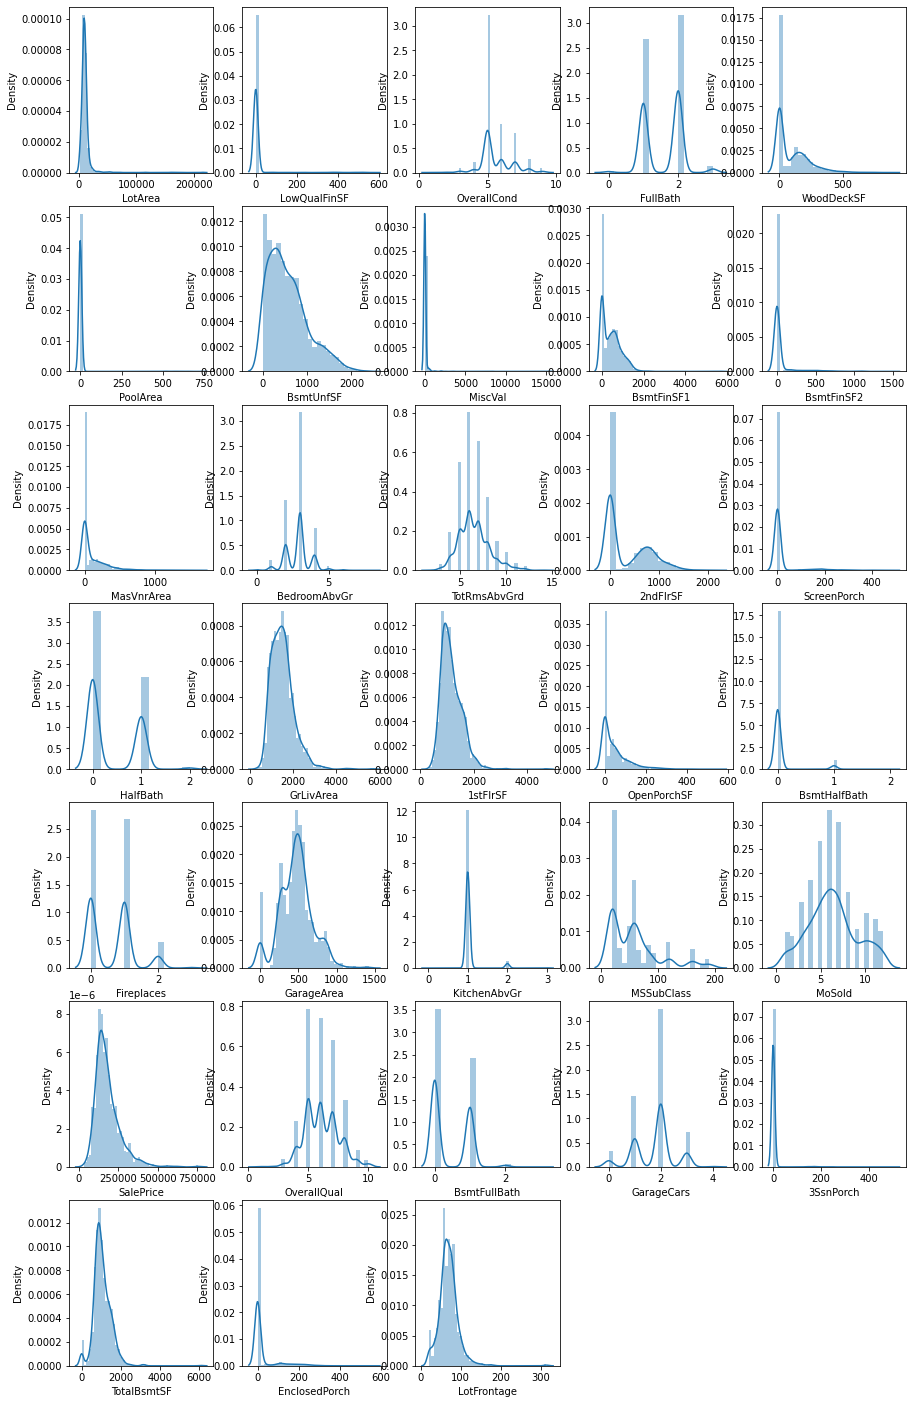

In [ ]:
plt.figure(figsize=(15,25))
for i,v in enumerate(list(house_data_numarical.columns)):
  plt.subplot(7,5,i+1)
  sns.distplot(house_data_numarical[v])
plt.show()




**Observation**
*   From the above analysis we can conclude, the numeric features are not normaly distributed

### Identifyng discrete and continous numerical variable

In [ ]:
discrete_feature=[feature for feature in house_data_numarical.columns if len(house_data_numarical[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [ ]:
print(discrete_feature)

['LowQualFinSF', 'OverallCond', 'FullBath', 'PoolArea', 'MiscVal', 'BedroomAbvGr', 'TotRmsAbvGrd', 'HalfBath', 'BsmtHalfBath', 'Fireplaces', 'KitchenAbvGr', 'MSSubClass', 'MoSold', 'OverallQual', 'BsmtFullBath', 'GarageCars', '3SsnPorch']


In [ ]:
continous_feature=[feature for feature in house_data_numarical.columns if feature not in discrete_feature]
print(continous_feature)

['LotArea', 'WoodDeckSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea', '2ndFlrSF', 'ScreenPorch', 'GrLivArea', '1stFlrSF', 'OpenPorchSF', 'GarageArea', 'SalePrice', 'TotalBsmtSF', 'EnclosedPorch', 'LotFrontage']


### Finding the relation of continous variable with the target variable

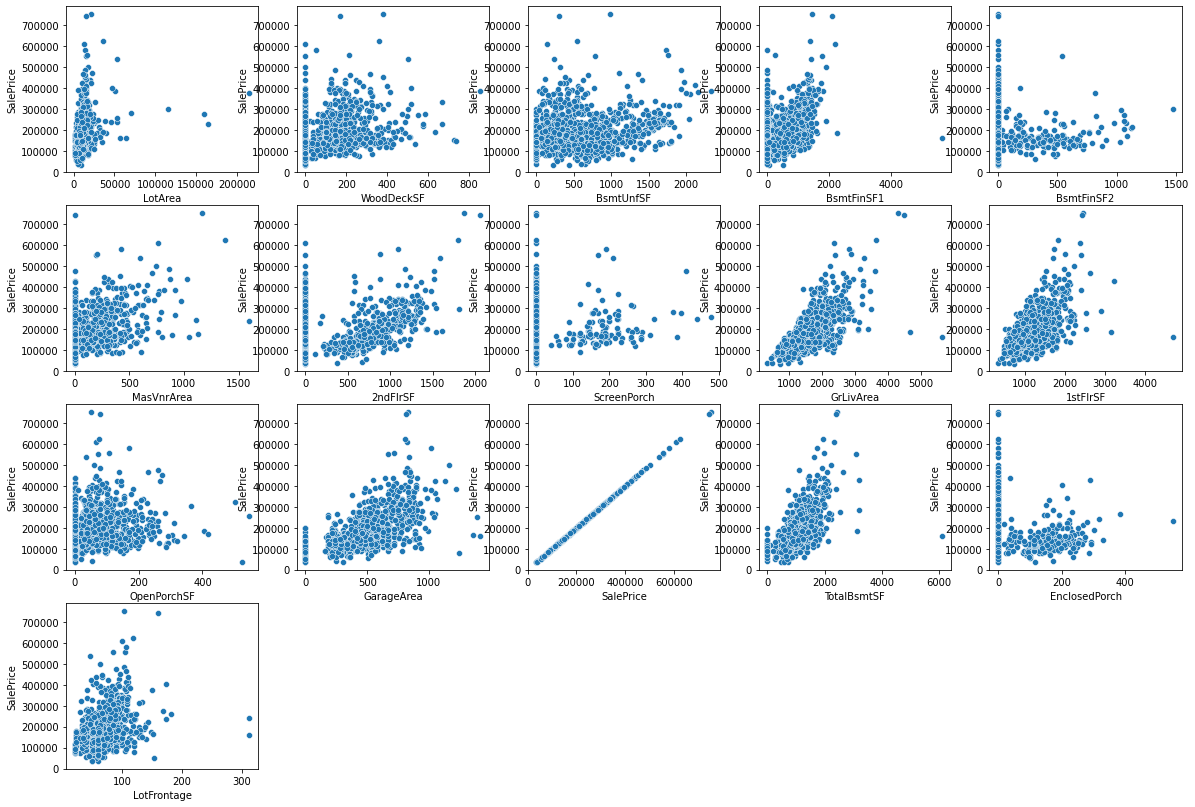

In [ ]:
plt.figure(figsize=(20,25))
for i,v in enumerate(continous_feature):
  plt.subplot(7,5,i+1)
  sns.scatterplot(house_data_numarical[v],house_data_numarical['SalePrice'])
plt.show()

In [ ]:
# using logarithmic transformation to check whether the distribution is log normal or not

# Before logarithmic transformation, we need to check if any 0 is present in the dataset or not. 
# if 0 is present in the feature, then we could not consider this feature for logarithmic transformation procedure.

non_zero_features=[feature for feature in continous_feature if 0 not in house_data_numarical[feature].unique()]
non_zero_features

['LotArea', 'GrLivArea', '1stFlrSF', 'SalePrice', 'LotFrontage']

### Applying logarithmic transformation on non zero features

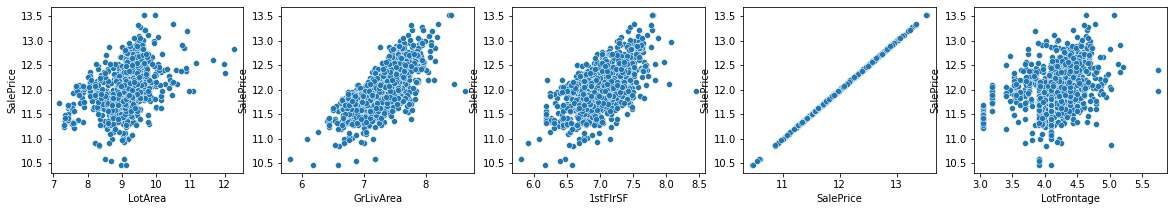

In [ ]:
plt.figure(figsize=(20,25))
for i,v in enumerate(non_zero_features):
  plt.subplot(7,5,i+1)
  sns.scatterplot(np.log(house_data_numarical[v]),np.log(house_data_numarical['SalePrice']))
plt.show()

**Observation**
*   From the above analysis we can conclude, the logarithmic transformation of features helps to make almost linear relation with target variable 

### Finding the relation of discrete variable with the target variable

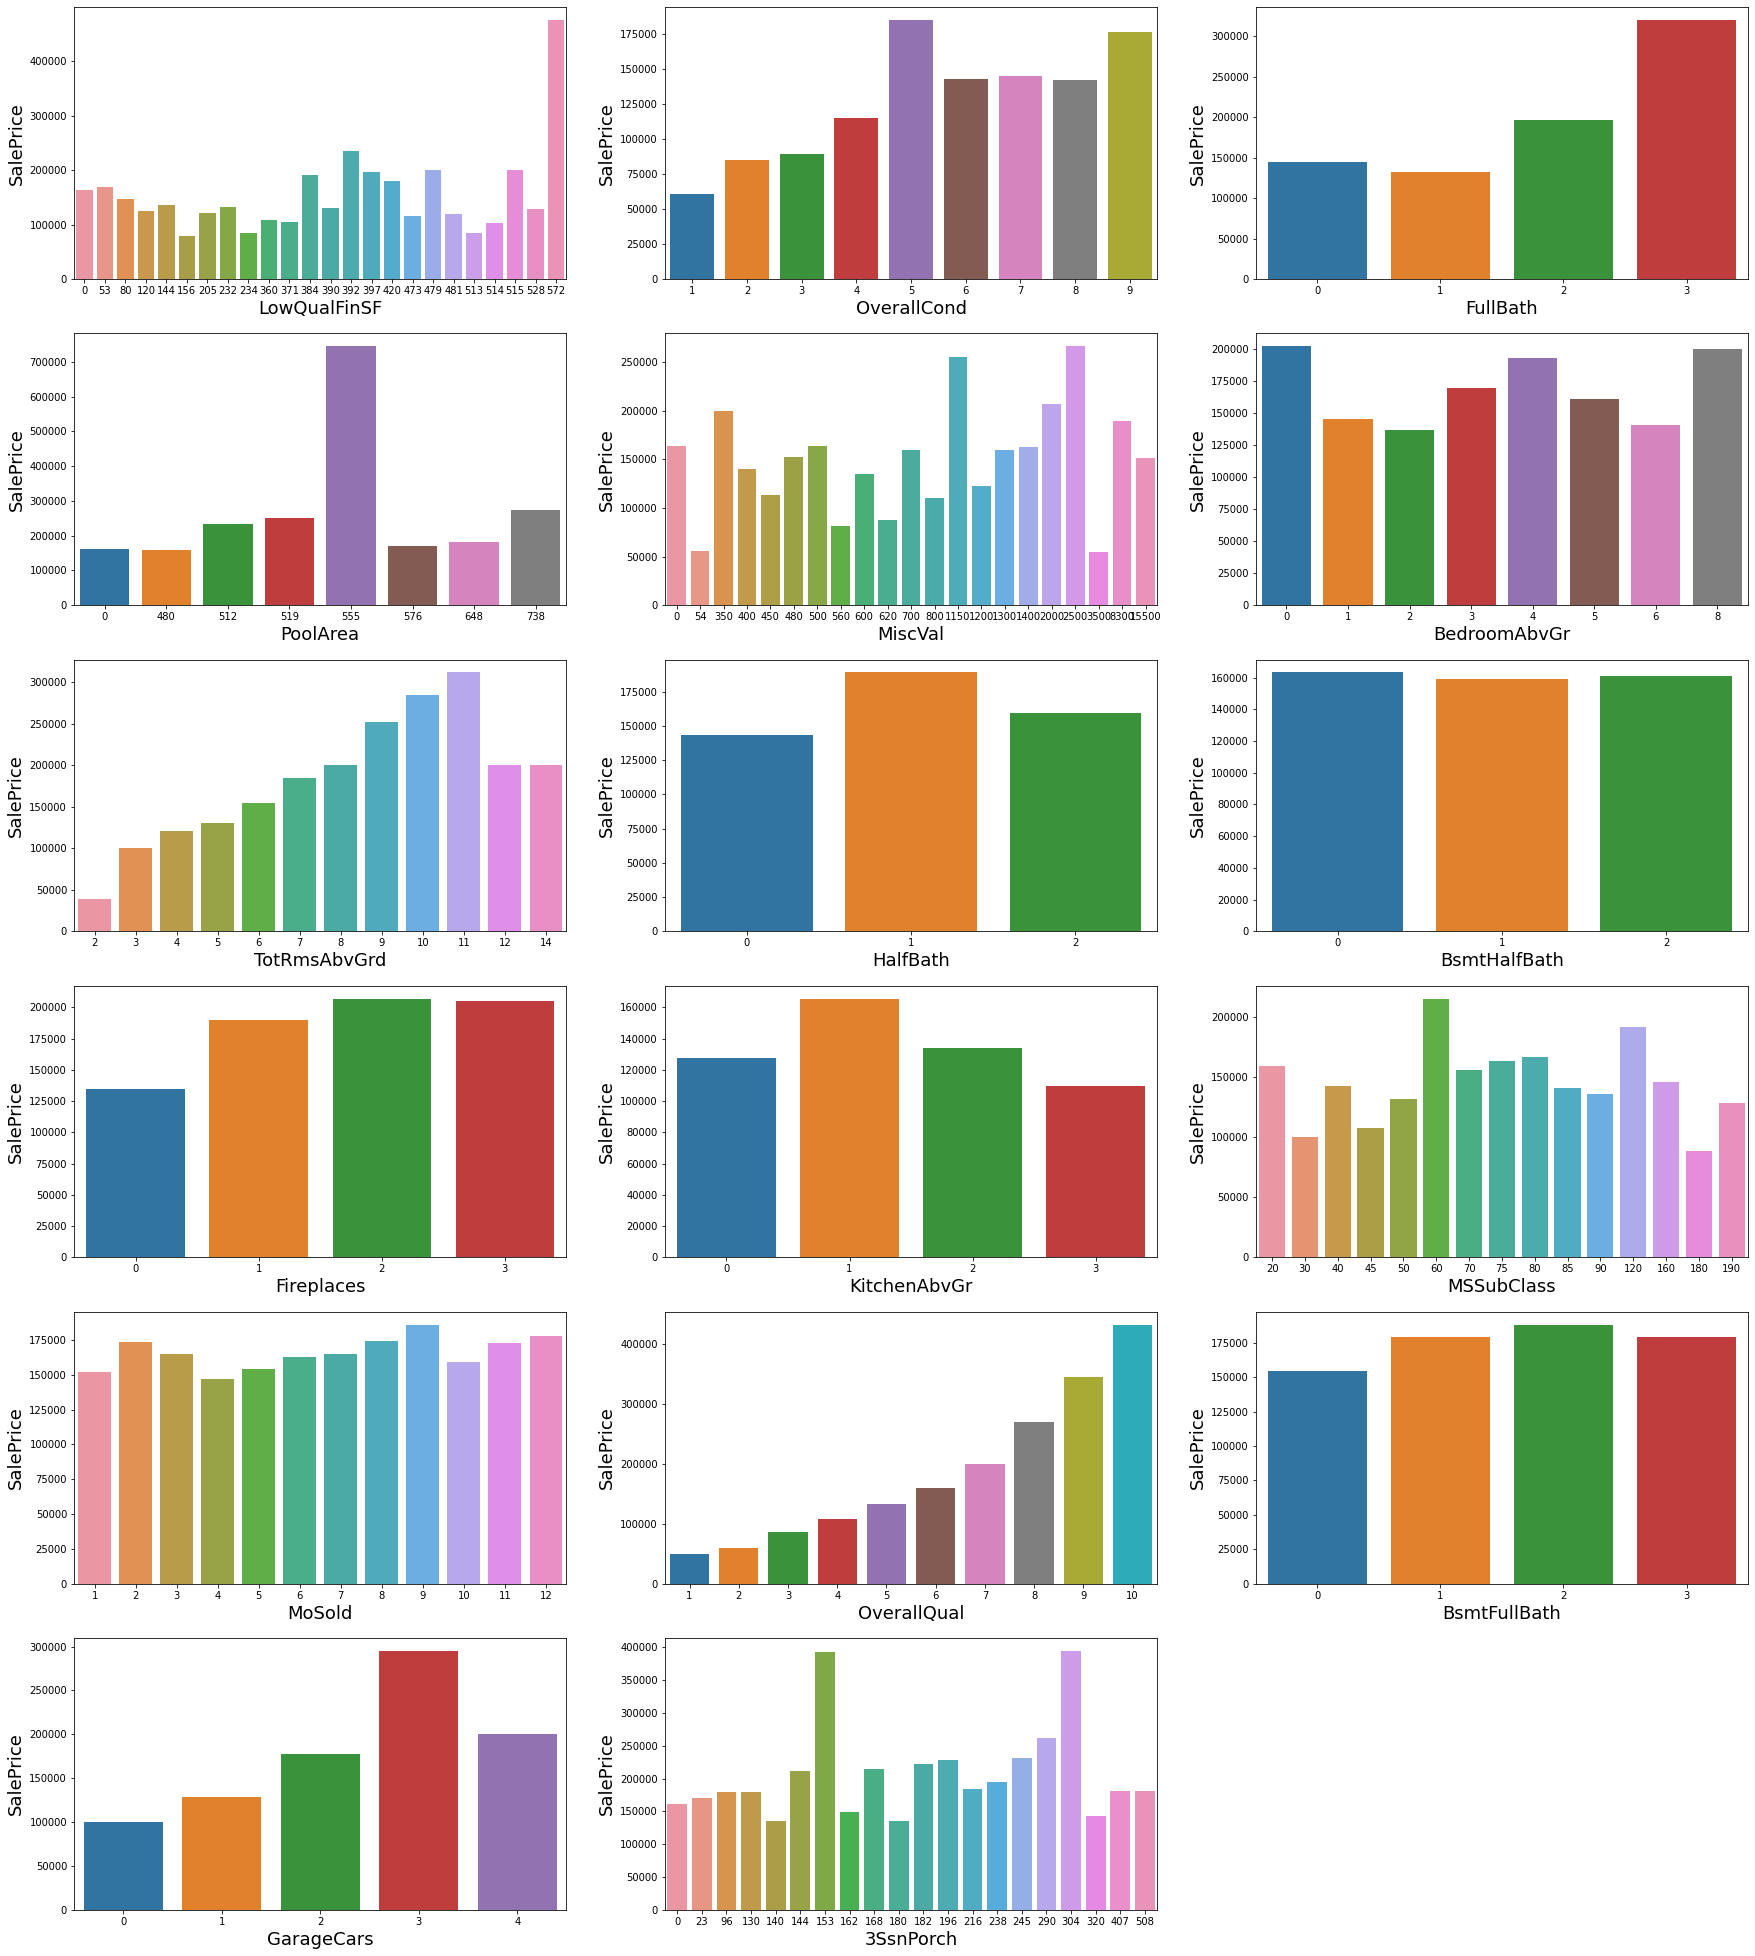

In [ ]:
plt.figure(figsize=(30,35))
for i,v in enumerate(discrete_feature):
  plt.subplot(6,3,i+1)
  df=pd.DataFrame(house_data_numarical.groupby(v)['SalePrice'].median())
  df.reset_index(inplace=True)
  sns.barplot(df[v],df['SalePrice'])
  plt.xlabel(v,fontsize=18)
  plt.ylabel('SalePrice',fontsize=18)
plt.show()

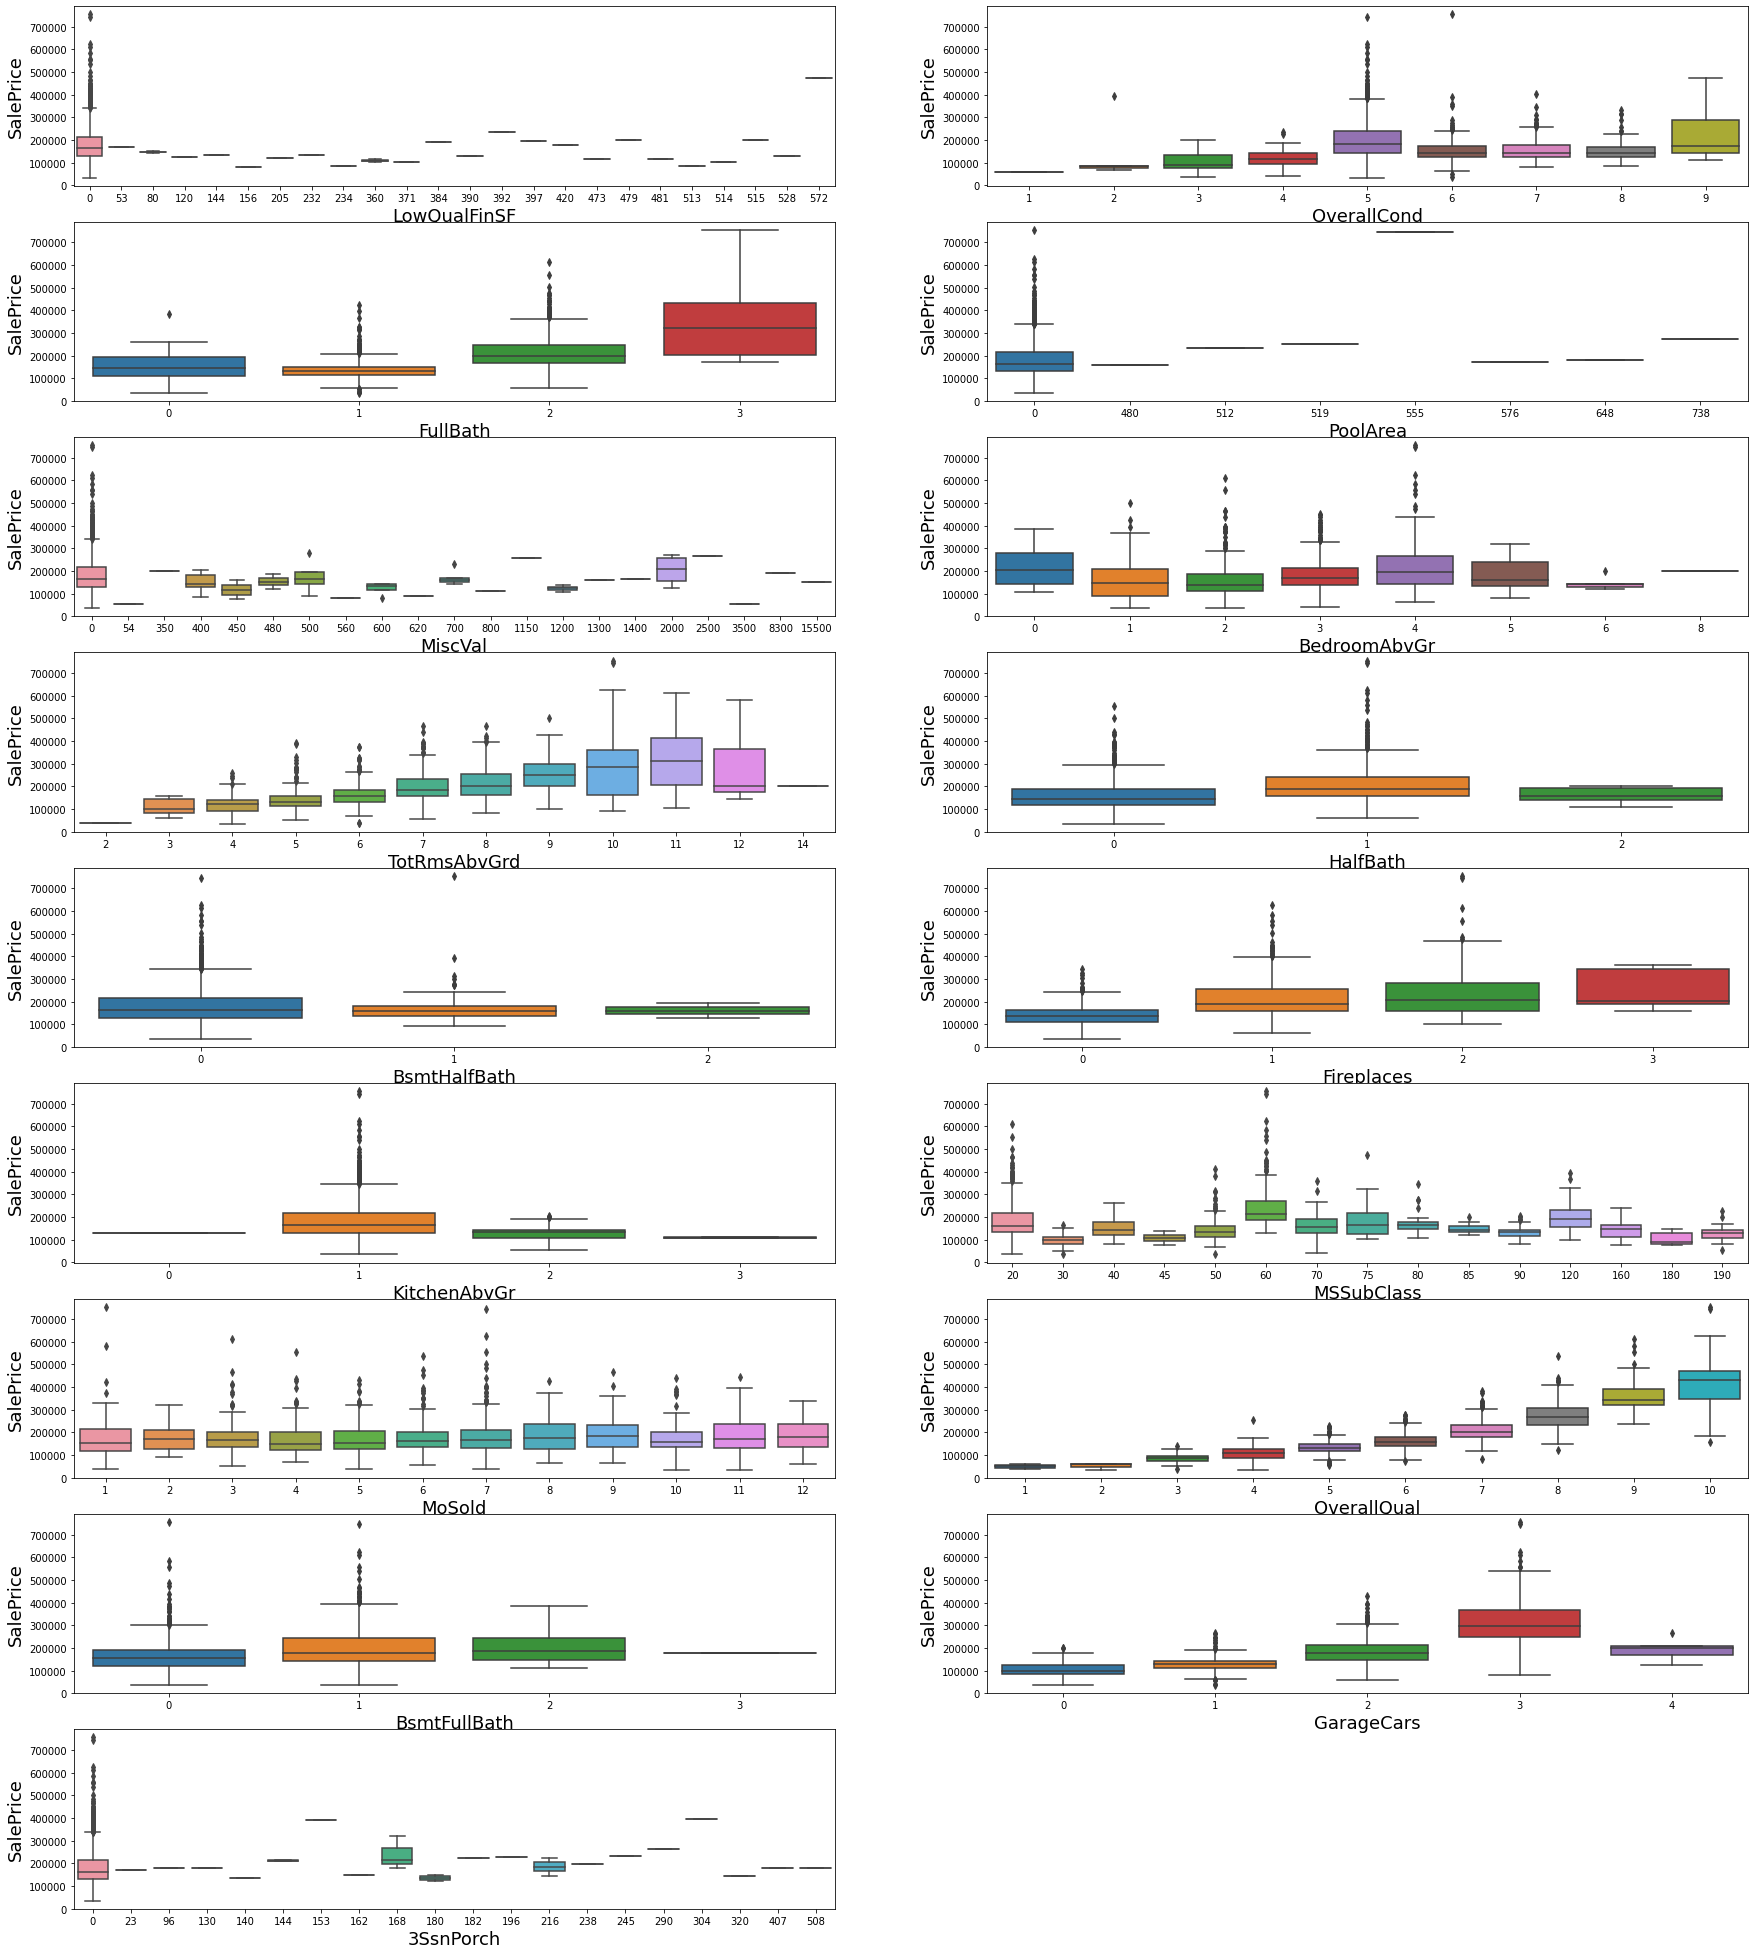

In [ ]:
plt.figure(figsize=(30,35))
for i,v in enumerate(discrete_feature):
  plt.subplot(9,2,i+1)
  sns.boxplot(house_data_numarical[v],house_data_numarical['SalePrice'])
  plt.xlabel(v,fontsize=18)
  plt.ylabel('SalePrice',fontsize=18)
plt.show()

**Observations**

*   The saleprice is maximum for Bedrooms Above Ground:0 and 8


*   Month (House) Sold: September, followed by Feb and Dec
*   The saleprice is very much dependent on Basement half bathrooms


*   The saleprice is maximum for Kitchens above grade: 1
*   The saleprice is maximum for PoolArea: 555



*   MSSubClass: Most preferred type of dwelling involved is 60 i.e. 12-STORY 1946 & NEWER


*   The saleprice is maximum for GarageCars space: 3
*   No significant preferences for Fireplaces

*   The saleprice is maximum for Rates the overall condition of the house:5
*   Overall Quality (material and finish):  Above Average


*   The saleprice is maximum for Full Bathrooms:3


*   The saleprice is maximum for  Total rooms above grade:11











### Checking Correlation between numerical variable

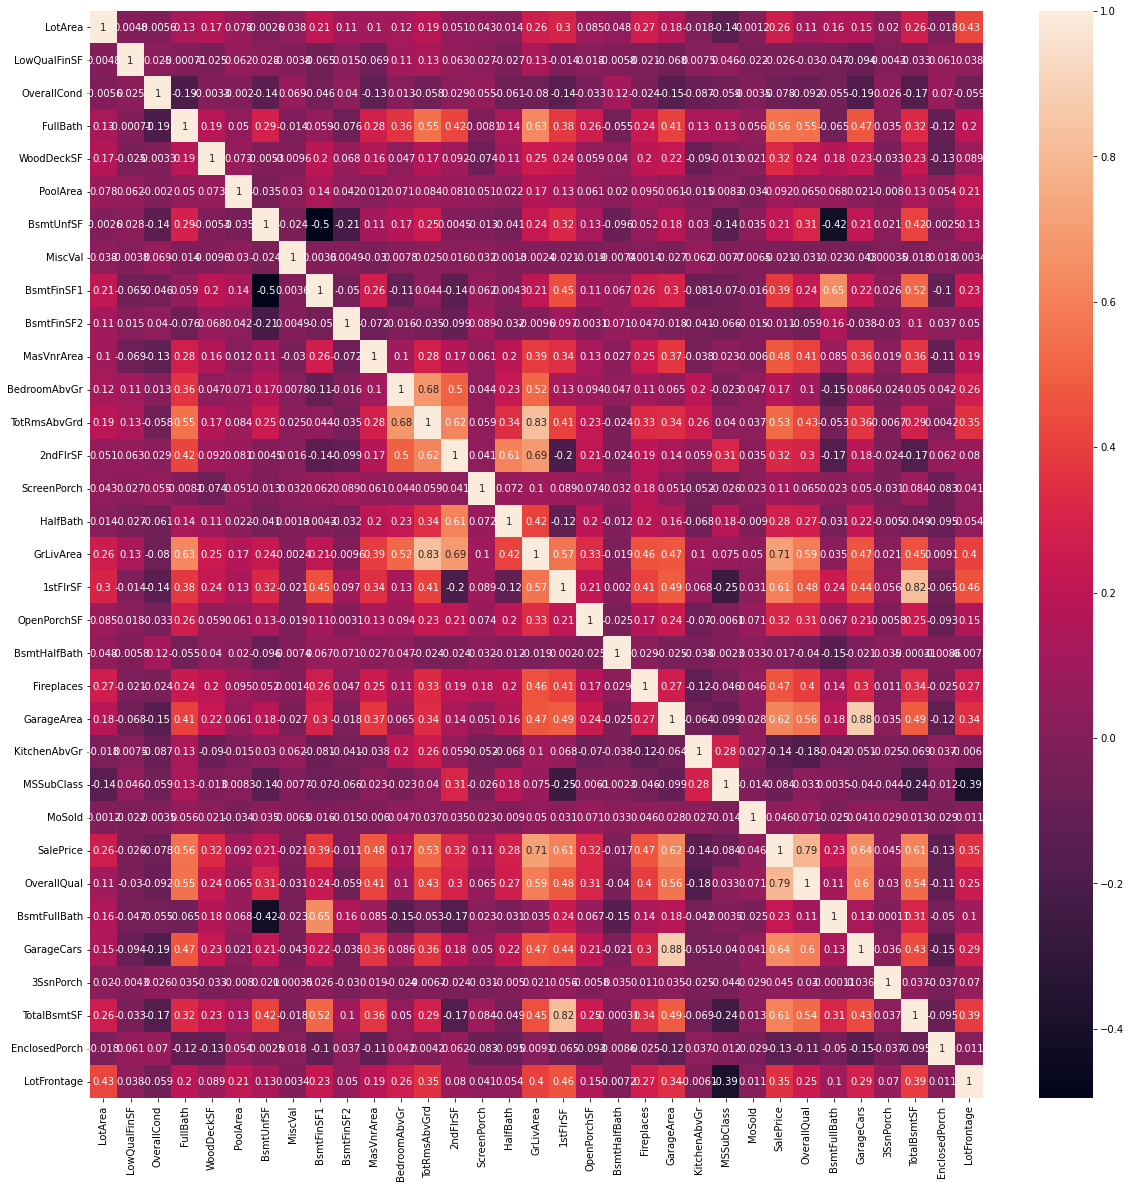

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(house_data_numarical.corr(),annot=True)



*  Saleprice is highly correlated with 'OverallQual','FullBath','TotRmsAbvGrd','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars'.
* 'GarageCars' is highly correlated with 'GarageArea' 


* '2ndFlrSF'  is highly correlated with   'GrLivArea' and 'HalfBath'
* 'TotRmsAbvGrd' is highly correlated with   'GrLivArea','FullBath','2ndFlrSF' and 'BedroomAbvGr'

* '1stFlrSF' s highly correlated with  'TotalBsmtSF' ,'GrLivArea'






### **Analysis on Catagorical Features**

In [ ]:
house_data_catagorical=house_data[catagorical_features]

In [ ]:
house_data_catagorical.shape

(1460, 43)

### Identifying the missing values present in Catagorical Features

In [ ]:
for i in house_data_catagorical.columns:
  print("{}% Percentage of missing values in the feature {}".format((house_data_catagorical[i].isnull().sum()/house_data_catagorical.shape[0])*100,i))

0.0% Percentage of missing values in the feature MSZoning
0.0% Percentage of missing values in the feature Street
93.76712328767123% Percentage of missing values in the feature Alley
0.0% Percentage of missing values in the feature LotShape
0.0% Percentage of missing values in the feature LandContour
0.0% Percentage of missing values in the feature Utilities
0.0% Percentage of missing values in the feature LotConfig
0.0% Percentage of missing values in the feature LandSlope
0.0% Percentage of missing values in the feature Neighborhood
0.0% Percentage of missing values in the feature Condition1
0.0% Percentage of missing values in the feature Condition2
0.0% Percentage of missing values in the feature BldgType
0.0% Percentage of missing values in the feature HouseStyle
0.0% Percentage of missing values in the feature RoofStyle
0.0% Percentage of missing values in the feature RoofMatl
0.0% Percentage of missing values in the feature Exterior1st
0.0% Percentage of missing values in the fe

**Observation**
*   The maximum nos of missing values present in the fetures 'Alley' ,'MiscFeature','Fence','PoolQC' and 'FireplaceQu'.

'Alley','MiscFeature','PoolQC'

### Identifying the unique values present in Catagorical Features

In [ ]:
def unique_value(df,f):
  return(df[f].nunique(),df[f].unique())


In [ ]:
for i in catagorical_features:
  print(i)
  print('nos of unique values: {}'.format(unique_value(house_data_catagorical,i)[0]))
  print('The unique values are: {}'.format(unique_value(house_data_catagorical,i)[1]))
  print('--------------------------------------------------------------------------')

MSZoning
nos of unique values: 5
The unique values are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------------------------------
Street
nos of unique values: 2
The unique values are: ['Pave' 'Grvl']
--------------------------------------------------------------------------
Alley
nos of unique values: 2
The unique values are: [nan 'Grvl' 'Pave']
--------------------------------------------------------------------------
LotShape
nos of unique values: 4
The unique values are: ['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------------------------------
LandContour
nos of unique values: 4
The unique values are: ['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------------------------------
Utilities
nos of unique values: 2
The unique values are: ['AllPub' 'NoSeWa']
--------------------------------------------------------------------------
LotConfig
nos of unique values: 5
The unique values are: ['Inside' 'FR2' 'C

### Finding the relation of Catagorical variable with the target variable

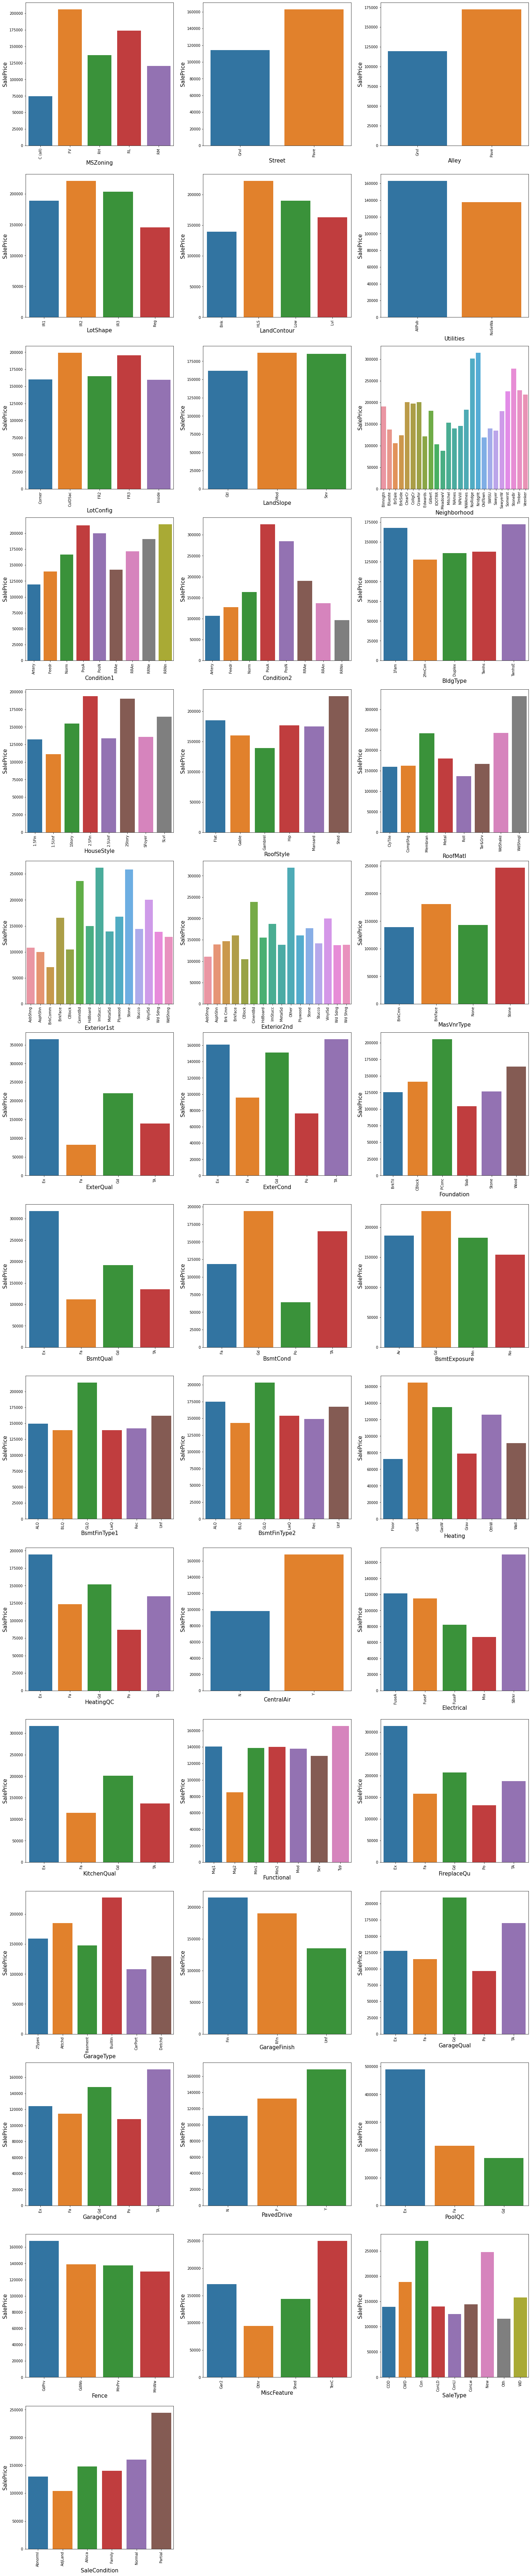

In [ ]:
plt.figure(figsize=(25,130))
for i,v in enumerate(catagorical_features):
  plt.subplot(15,3,i+1)
  df=pd.DataFrame(house_data.groupby(v)['SalePrice'].median())
  df.reset_index(inplace=True)
  sns.barplot(df[v],df['SalePrice'])
  plt.xticks(rotation=90)
  plt.xlabel(v,fontsize=15)
  plt.ylabel('SalePrice',fontsize=15)
plt.show()

**Observation**
*   The saleprice is maximum for floating Village Residential 
*   The saleprice is maximum for Type of road access to property: Paved


*   The saleprice is maximum for  Type of alley access to property: Paved
*   The saleprice is maximum for  General shape of property: Moderately Irregular


*   The saleprice is maximum for Flatness of the property: Hillside Significant 
slope from side to side 
*   The saleprice is maximum for Type of utilities available: All public Utilities (E,G,W,& S)


*   The saleprice is maximum for Lot configuration:Cul-de-sac
*   The saleprice is maximum for Slope of property:Moderate Slope	and Severe Slope
*   The saleprice is maximum for Physical locations within Ames city limits:Northridge
*   The saleprice is maximum for Proximity to various conditions:Adjacent to postive off-site feature and Within 200' of East-West Railroad


*  The saleprice is maximum for Type of dwelling:Single-family Detached	 and Townhouse Inside Unit
*  The saleprice is maximum for HouseStyle:Two and one-half story: 2nd level finished and Two story


*   The saleprice is maximum for Type of roof: Shed
*   The saleprice is maximum for Roof material:Wood Shingles
*   The saleprice is maximum for Exterior covering on house:Imitation Stucco and Stone


*   The saleprice is maximum for  Masonry veneer type:Stone


*   The saleprice is maximum for  Evaluates the quality of the material on the exterior:Excellent
*   The saleprice is maximum for  Type of foundation:Poured Contrete	


*   The saleprice is maximum for  Evaluates the height of the basement:Excellent (100+ inches)	
*   The saleprice is maximum for Refers to walkout or garden level walls:Good Exposure



*   The saleprice is maximum for Rating of basement finished area:Good Living Quarters
*   The saleprice is maximum for Type of heating:Gas forced warm air furnace


*   The saleprice is maximum for Central air conditioning:Yes
*  The saleprice is maximum for  Electrical system:Standard Circuit Breakers & Romex


*  The saleprice is maximum for  Kitchen quality:Excellent
*  The saleprice is maximum for  Fireplace quality:Excellent - Exceptional Masonry Fireplace



*   The saleprice is maximum for  Garage location:Built-In (Garage part of house - typically has room above garage)

*   The saleprice is maximum for  Garage quality:Good

*   The saleprice is maximum for Paved driveway:Paved 
*  The saleprice is maximum for  Pool quality:Excellent


*   The saleprice is maximum for Fence quality:Good Privacy


*   The saleprice is maximum for  Type of sale:Contract 15% Down payment regular terms
*   The saleprice is maximum for  Condition of sale:Home was not completed when last assessed (associated with New Homes)






















### **Analysis on Temporal Features**

In [ ]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
house_data_temporal=house_data[temporal_features]

### Identifying the unique values present in Temporal Features

In [ ]:
def unique_value(df,f):
  return(df[f].nunique(),df[f].unique())


In [ ]:
for i in temporal_features:
  print(i)
  print('nos of unique values: {}'.format(unique_value(house_data_temporal,i)[0]))
  print('The unique values are: {}'.format(unique_value(house_data_temporal,i)[1]))
  print('--------------------------------------------------------------------------')

YearBuilt
nos of unique values: 112
The unique values are: [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
--------------------------------------------------------------------------
YearRemodAdd
nos of unique values: 61
The unique values are: [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 19

### Identifying the missing values present in  Temporal  data

In [ ]:
for i in house_data_temporal.columns:
  print("{}% Percentage of missing values in the feature {}".format((house_data_temporal[i].isnull().sum()/house_data_temporal.shape[0])*100,i))

0.0% Percentage of missing values in the feature YearBuilt
0.0% Percentage of missing values in the feature YearRemodAdd
5.5479452054794525% Percentage of missing values in the feature GarageYrBlt
0.0% Percentage of missing values in the feature YrSold


**Observation**
*   There is only one temporal variables named 'GarageYrBlt' has missing values and the percentage are 5.547% 

### Finding the relation of Temporal variable with the target variable

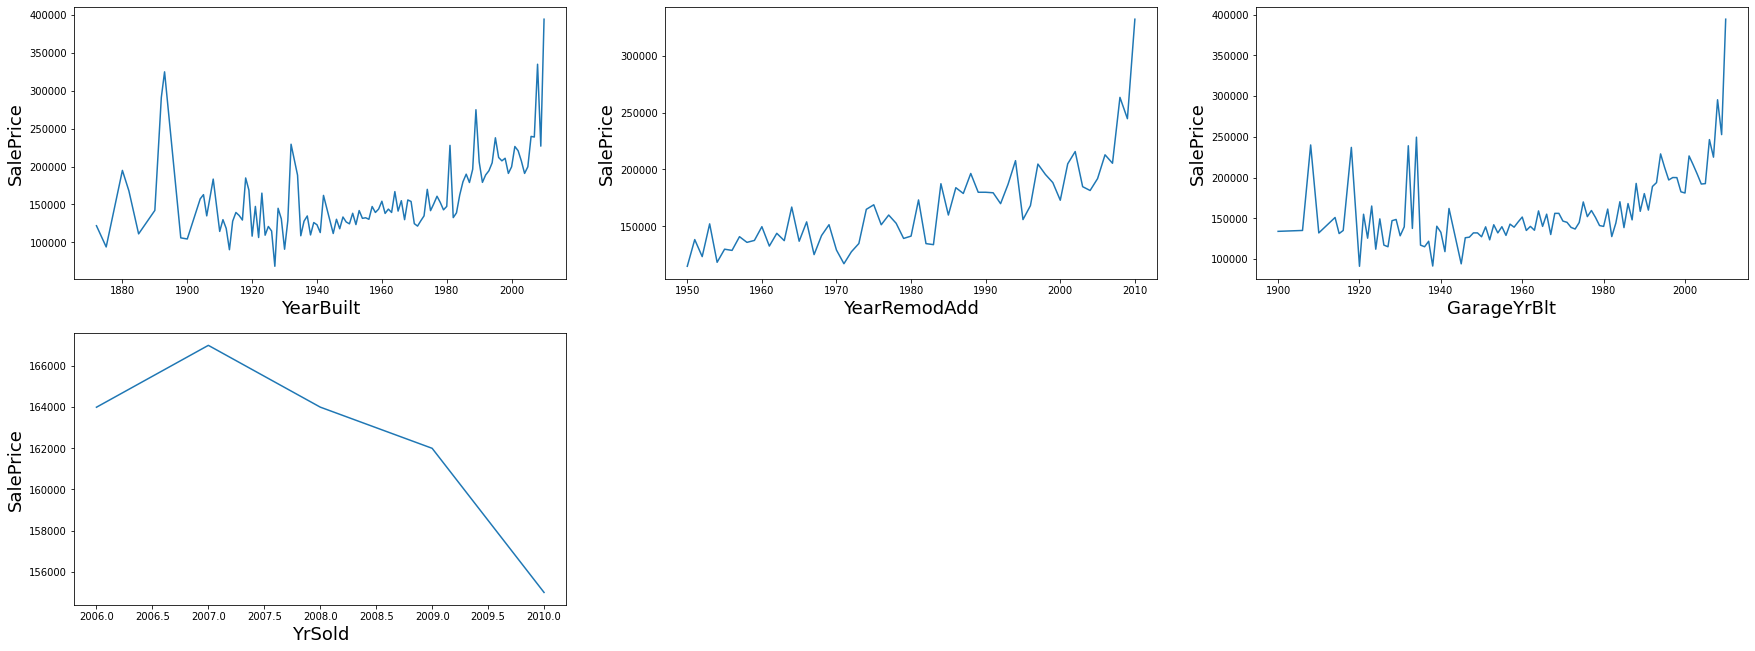

In [ ]:
plt.figure(figsize=(30,35))
for i,v in enumerate(temporal_features):
  plt.subplot(6,3,i+1)
  df=pd.DataFrame(house_data.groupby(v)['SalePrice'].median())
  df.reset_index(inplace=True)
  sns.lineplot(df[v],df['SalePrice'])
  plt.xlabel(v,fontsize=18)
  plt.ylabel('SalePrice',fontsize=18)
plt.show()

**Observation**



*   High sale price property are sold maximum in the year of 2007. After that the sale of expensive property become decreased



# **Data Preprocessing**

In [ ]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_data=house_data.drop('Id',axis=1)

### Delete the feature which contain more than 90% missing value

In [ ]:
house_data.shape

(1460, 80)

In [ ]:
house_data=house_data.drop(['Alley','MiscFeature','PoolQC'], axis=1)

In [ ]:
droped_feature=['Alley','MiscFeature','PoolQC']

for i in droped_feature:
    catagorical_features.remove(i)
len(catagorical_features)

40

In [ ]:
house_data.shape

(1460, 77)

In [ ]:
#Imputing the missing Values with 'No_Basementh'

basement=['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond']
for i in basement:
    house_data[i] = house_data[i].fillna('No_Basement')

In [ ]:
house_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No_Basement', 'LwQ'],
      dtype=object)

In [ ]:
#Imputing the missing values with 'No_Garage' 
garage=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for i in garage:
    house_data[i] = house_data[i].fillna('No_Garage')

In [ ]:
house_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No_Garage', 'Basment',
       '2Types'], dtype=object)

In [ ]:
#Imputing the missing values 

house_data['FireplaceQu']=house_data['FireplaceQu'].fillna('No_Fireplace')
house_data['Electrical']=house_data['Electrical'].fillna('Other')
house_data['Fence']=house_data['Fence'].fillna('No_Fence')


In [ ]:
house_data['Electrical'].isnull().sum()/house_data.shape[0]*100

0.0

In [ ]:
house_data['FireplaceQu'].unique()

array(['No_Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
#Imputing the numerical missing values with median because median is less effected by outliers

numerical_missing=['LotFrontage','MasVnrArea','GarageYrBlt']

for i in numerical_missing:
  house_data[i] = house_data[i].fillna(house_data[i].median())
    

In [ ]:
house_data[numerical_missing].isnull().sum()
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
house_data[house_data.isna()== 'True'].count().sum()

0

### Derived features

In [ ]:
#Derive a new variable named 'AgeofProperty' to determine the age of property since the built

    
house_data['AgeofProperty'] = house_data['YrSold']-house_data['YearBuilt']
house_data['AgeofProperty'] .head()

0     5
1    31
2     7
3    91
4     8
Name: AgeofProperty, dtype: int64

In [ ]:
#Create a new column named 'Remodelled'to determine whether the house has been remodelled or not 

def Remodel(df):   
    if(df['YearBuilt'] == df['YearRemodAdd']):
        return 0    
    elif (df['YearBuilt'] < df['YearRemodAdd']):
        return 1   
    else:
        return 2  
    
house_data['Remodelled'] = house_data.apply(Remodel, axis=1)
house_data['Remodelled'].head()    


0    0
1    0
2    1
3    1
4    0
Name: Remodelled, dtype: int64

In [ ]:
house_data = house_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeofProperty,Remodelled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No_Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No_Fence,0,2,WD,Normal,208500,5,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No_Fence,0,5,WD,Normal,181500,31,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No_Fence,0,9,WD,Normal,223500,7,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No_Fence,0,2,WD,Abnorml,140000,91,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No_Fence,0,12,WD,Normal,250000,8,0


### log transform of numerical feature to convert it to normal distribution

In [ ]:
non_zero_features

['LotArea', 'GrLivArea', '1stFlrSF', 'SalePrice', 'LotFrontage']

In [ ]:
# As we can see in the EDA Section, that if we transform the non_zero_features to log distribution, 
#then the distribution of the feature with the target variable become more linear 

for i in non_zero_features:
    house_data[i]=np.log(house_data[i])

### Feature transform of Ordered feature

In [ ]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

house_data['ExterQual'] = house_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_data['BsmtQual'] = house_data['BsmtQual'].map({'No_Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_data['BsmtCond'] = house_data['BsmtCond'].map({'No_Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_data['BsmtExposure'] = house_data['BsmtExposure'].map({'No_Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_data['BsmtFinType1'] = house_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'No_Basement': 0})
house_data['BsmtFinType2'] = house_data['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'No_Basement': 0})
house_data['HeatingQC'] = house_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_data['CentralAir'] = house_data['CentralAir'].map({'N':0,'Y':1})
house_data['KitchenQual'] = house_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_data['FireplaceQu'] = house_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No_Fireplace': 0})
house_data['GarageFinish'] = house_data['GarageFinish'].map({'No_Garage':0,'Unf':1,'RFn':2,'Fin':3})
house_data['GarageQual'] = house_data['GarageQual'].map({'No_Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_data['GarageCond'] = house_data['GarageCond'].map({'No_Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_data['ExterCond'] = house_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_data['LotShape'] = house_data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [ ]:
house_data.shape

(1460, 75)

### Feature transform of unordered feature

In [ ]:
ordered_feature=['ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']

unordered_feature=[]

for i in catagorical_features:
  if i not in ordered_feature:
    unordered_feature.append(i)
    
unordered_feature

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [ ]:
len(unordered_feature)

25

In [ ]:
def unique_value(df,f):
  return(df[f].nunique(),df[f].unique())


In [ ]:
sum = 0
for feature in unordered_feature:
  
  sum += len(house_data[feature].unique())
print(sum)

181


In [ ]:
def getdummies(unordered_feature):
  data = pd.DataFrame()
  for feature in unordered_feature:
    unordered_feature_dummies = pd.get_dummies(house_data[feature], prefix=feature,drop_first=True)
    data = pd.concat([data,unordered_feature_dummies],axis=1)
  return data

unordered_feature_dummies = getdummies(unordered_feature)
unordered_feature_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_Other,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No_Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [ ]:
unordered_feature_dummies.shape

(1460, 155)

In [ ]:
house_data = house_data.drop(unordered_feature, axis=1)

In [ ]:
house_data.shape

(1460, 50)

In [ ]:
# concat dummy variables with house_data

house_data = pd.concat([house_data, unordered_feature_dummies], axis=1)

In [ ]:
house_data.shape

(1460, 205)

# **Train Test Split**

In [ ]:
y = house_data['SalePrice']
X=house_data.drop('SalePrice',axis=1)

X.shape,y.shape

((1460, 204), (1460,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1021, 204), (438, 204), (1021,), (438,))

### Scaling numerical features

In [ ]:
len(numerical_features)

33

In [ ]:
# Add temporal feature named: 'AgeofProperty' in numerical feature and remove 'SalePrice' from numerical feature

numerical_features.append('AgeofProperty')
numerical_features.remove('SalePrice')
print(numerical_features)



['LotArea', 'LowQualFinSF', 'OverallCond', 'FullBath', 'WoodDeckSF', 'PoolArea', 'BsmtUnfSF', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'MasVnrArea', 'BedroomAbvGr', 'TotRmsAbvGrd', '2ndFlrSF', 'ScreenPorch', 'HalfBath', 'GrLivArea', '1stFlrSF', 'OpenPorchSF', 'BsmtHalfBath', 'Fireplaces', 'GarageArea', 'KitchenAbvGr', 'MSSubClass', 'MoSold', 'OverallQual', 'BsmtFullBath', 'GarageCars', '3SsnPorch', 'TotalBsmtSF', 'EnclosedPorch', 'LotFrontage', 'AgeofProperty']


In [ ]:
scaler = StandardScaler()

X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:
X_train[numerical_features].head()

,LotArea,LowQualFinSF,OverallCond,FullBath,WoodDeckSF,PoolArea,BsmtUnfSF,MiscVal,BsmtFinSF1,BsmtFinSF2,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,2ndFlrSF,ScreenPorch,HalfBath,GrLivArea,1stFlrSF,OpenPorchSF,BsmtHalfBath,Fireplaces,GarageArea,KitchenAbvGr,MSSubClass,MoSold,OverallQual,BsmtFullBath,GarageCars,3SsnPorch,TotalBsmtSF,EnclosedPorch,LotFrontage,AgeofProperty
210,-0.912571,-0.124502,0.383154,-1.026085,-0.743160,-0.062302,-0.374367,-0.084263,0.043512,-0.293313,-0.558025,-1.042717,-0.935650,-0.787597,-0.275126,-0.751723,-1.533010,-0.770805,-0.709347,-0.247791,-0.925422,-2.217786,-0.234155,-0.657071,-0.832187,-0.779861,1.066863,-2.366798,-0.121922,-0.430911,1.150231,0.037108,1.529604
318,0.182398,-0.124502,-0.533005,0.786428,1.989482,-0.062302,-0.454644,-0.084263,1.160345,-0.293313,0.809137,1.396261,1.556976,2.140556,-0.275126,1.246998,1.848041,0.661053,0.197980,-0.247791,0.623522,0.867506,-0.234155,0.035976,-0.832187,0.649651,1.066863,1.645101,-0.121922,0.621579,1.910043,0.943300,-0.677573
239,-0.057184,-0.124502,-1.449164,-1.026085,-0.743160,-0.062302,0.171964,-0.084263,-0.761296,-0.293313,-0.558025,0.176772,0.310663,0.795996,-0.275126,1.246998,0.107150,-1.016844,1.407748,-0.247791,0.623522,-1.183084,-0.234155,-0.195040,-0.832187,-0.065105,-0.837450,-1.029498,-0.121922,-0.712011,-0.369395,-0.741137,0.936631
986,-1.016263,-0.124502,2.215472,-1.026085,2.423490,-0.062302,-0.175904,-0.084263,-0.963574,-0.293313,-0.558025,-1.042717,-0.935650,0.669584,-0.275126,-0.751723,0.393776,-0.315096,-0.709347,-0.247791,-0.925422,-1.018473,-0.234155,-0.195040,-0.104424,-0.065105,-0.837450,-1.029498,-0.121922,-1.256778,-0.369395,-0.353337,1.957862
1416,0.443706,-0.124502,0.383154,0.786428,-0.743160,-0.062302,0.475233,-0.084263,-0.963574,-0.293313,-0.558025,1.396261,2.803289,1.611926,-0.275126,-0.751723,1.411534,0.362789,-0.709347,-0.247791,-0.925422,0.416000,4.112612,3.039179,-0.832187,-1.494617,-0.837450,0.307802,-0.121922,-0.620490,1.435160,-0.301729,2.913207


### Find out the feature which is highly correlated to each other

In [ ]:
#https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10 : 
#Above is the reference link which i followed to check paire wise correlation

cor=pd.DataFrame(X_train.corr().abs().unstack())
cor.reset_index(inplace=True)
cor.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'corr'},inplace=True)

# Find out the features which are highly correlated to each other( 0.7=< Correlation Coefficient <1)

highly_correlated_feature=cor[(cor['corr'] < 1) & (cor['corr'] >= 0.7)]
highly_correlated_feature

,Feature_1,Feature_2,corr
823,OverallQual,ExterQual,0.717270
1432,ExterQual,OverallQual,0.717270
1458,ExterQual,KitchenQual,0.721145
2871,BsmtFinType2,BsmtFinSF2,0.783770
3074,BsmtFinSF2,BsmtFinType2,0.783770
3488,TotalBsmtSF,1stFlrSF,0.769616
4097,1stFlrSF,TotalBsmtSF,0.769616
4392,2ndFlrSF,HouseStyle_1Story,0.775245
4395,2ndFlrSF,HouseStyle_2Story,0.807479
4723,GrLivArea,TotRmsAbvGrd,0.814387


In [ ]:
corr_column=['ExterQual', 'BsmtFinSF2', '1stFlrSF', 'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageArea', 'GarageCond', 'MSZoning_RM', 
 'Neighborhood_Somerst', 'BldgType_Duplex', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Hip', 'RoofStyle_Shed', 
 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 
 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'Foundation_PConc', 'Heating_GasW', 
 'GarageType_Detchd', 'GarageType_No_Garage', 'Fence_No_Fence', 'SaleType_WD', 'SaleCondition_Partial']

In [ ]:
# Delet the highly correlated features

X_train=X_train.drop(corr_column,axis=1)

In [ ]:
X_test=X_test.drop(corr_column,axis=1)

In [ ]:
X_train.shape,X_test.shape

((1021, 171), (438, 171))

# **Model Building**

## **Recursive Feature Elimination**

In [ ]:
# Selecting top 100 feature using RFE

lr_rfe=LinearRegression()
lr_rfe.fit(X_train,y_train)

rfe = RFE(lr_rfe,n_features_to_select=80)             
rfe = rfe.fit(X_train, y_train)

### Columns selected by RFE and their weights

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 31),
 ('LotFrontage', False, 43),
 ('LotArea', True, 1),
 ('LotShape', False, 72),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 57),
 ('ExterCond', False, 55),
 ('BsmtQual', False, 52),
 ('BsmtCond', False, 17),
 ('BsmtExposure', False, 24),
 ('BsmtFinType1', False, 61),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 73),
 ('BsmtUnfSF', False, 36),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 53),
 ('CentralAir', True, 1),
 ('2ndFlrSF', False, 16),
 ('LowQualFinSF', False, 60),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 79),
 ('FullBath', False, 81),
 ('HalfBath', False, 75),
 ('BedroomAbvGr', False, 48),
 ('KitchenAbvGr', False, 5),
 ('Fireplaces', False, 39),
 ('GarageFinish', False, 88),
 ('GarageCars', True, 1),
 ('GarageQual', False, 70),
 ('WoodDeckSF', False, 59),
 ('OpenPorchSF', False, 65),
 ('EnclosedPorch', False, 68),
 ('3SsnPorch', False, 67),
 ('ScreenPorch', False, 64),
 (

### Columns selected by RFE

In [ ]:
col=X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       'CentralAir', 'GrLivArea', 'GarageCars', 'AgeofProperty', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 'LandContour_Low',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel

### Columns not selected by RFE

In [ ]:
col_not=X_train.columns[~rfe.support_]
col_not

Index(['MSSubClass', 'LotFrontage', 'LotShape', 'MasVnrArea', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'HeatingQC', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageFinish', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'Remodelled', 'LandContour_HLS', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Veenker', 'Condition2_Norm', 'Condition2_RRAe',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoy

### Creating X_train,X_test dataframe with RFE selected variable

In [ ]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# **Bulding model with Linear Regression without Regularization**

In [ ]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [ ]:
lr_wth_reg = sm.OLS(y_train,X_train_rfe_sm).fit()

In [ ]:
print(lr_wth_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     181.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:01:55   Log-Likelihood:                 924.47
No. Observations:                1021   AIC:                            -1687.
Df Residuals:                     940   BIC:                            -1288.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.11

**Observation**



*   The value of  F-statistic is high andthe value of Prob (F-statistic) is very low near to zero,so we can conclude that the model is significant.

*  The value of  R-squared is 0.939 and Adjusted R-squared is 0.934 which are high .From the R-squared value we can conclude 93% of the variance in the data is being explained by the model.



*   There are many features whise p-value is more than the significant level which is greater than 0.05.So that we can say the variable is insignificant in the prediction of the target variable.



In [ ]:
linear = LinearRegression()

linear.fit(X_train_rfe, y_train)
print("Intercept: ", linear.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",linear.coef_)

Intercept:  9.111542457778977
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.06179809  0.08210126  0.05973536  0.05433567  0.04718245  0.06830207
  0.14538538  0.03307599 -0.1047047   0.08287494  0.08511598  0.06068406
  0.18168997 -0.03533318 -0.0443631  -0.04984253  0.04417354 -0.05765932
  0.07921544 -0.07307091 -0.07331348 -0.04323098 -0.03328178 -0.09669577
 -0.06321061 -0.10726993  0.02534928 -0.07742315 -0.06706589  0.05456756
 -0.05682114  0.06063078  0.10010574  0.10591373  0.11225055 -0.05135864
  0.05010859  0.05880181  0.21562546 -0.07263157  0.32086543 -1.46958137
 -0.22606675  0.10657162  0.02627757  0.06387353  0.06389902  0.07492222
  2.39016956  2.67959939  2.49885521  2.29673813  2.51785869  2.35054256
  2.50968115 -0.19582032  0.09333662  0.03692964  0.07042762  0.03013352
  0.07626524 -0.11128916 -0.05462303  0.06316425 -0.07601555  0.05966465
  0.07995883 -0.0793813  -0.43642782  0.09236028 -0.03490636 

In [ ]:
def datadisplay(df):
  x= PrettyTable()
  x.field_names = df.columns
  for index, row in df.iterrows():
    x.add_row(row)
  return x

In [ ]:
##Making predictions for train and test sets: linear Regression Model
y_pred_train = linear.predict(X_train_rfe)
y_pred_test= linear.predict(X_test_rfe)

##R2 score for linear Regression Model
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_true= y_test, y_pred= y_pred_test)

##Check the mean squared error (MSE) for linear Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_linear=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_linear':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_linear':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_linear))

The model evaluation
+----------+--------------+-------------+
|  score   | Train_linear | Test_linear |
+----------+--------------+-------------+
| r2_score |    0.9391    |    0.8724   |
|   MSE    |    0.0096    |    0.021    |
|   MAE    |    0.0714    |    0.0919   |
|   RMSE   |    0.0978    |    0.1449   |
+----------+--------------+-------------+


**Observation**



*   From the above model we can conclude, the linear regression model is slightly overfit. To reduce the variance of the model we need to use regularization method

### Error Distribution

In [ ]:
res_train= y_train - y_pred_train
res_test= y_test - y_pred_test

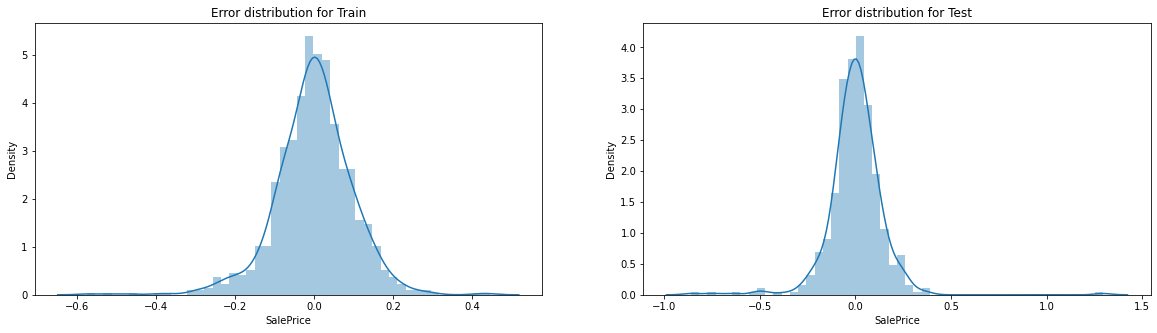

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(res_train)
plt.title('Error distribution for Train')

plt.subplot(1, 2, 2)
sns.distplot(res_test)
plt.title('Error distribution for Test')

plt.show()

**Observation**

* The residuals terms are normally distributed and have a mean value of zero for both train and test data

###  Homoscedasticity

Text(0, 0.5, 'res_test')

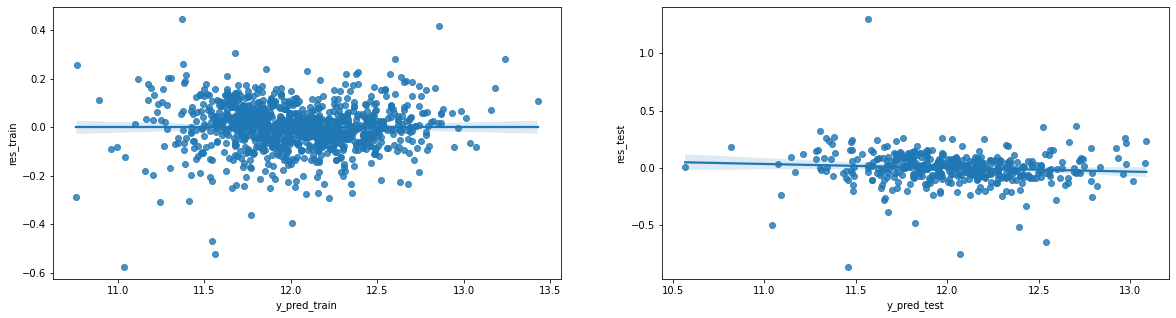

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.regplot(y_pred_train,res_train) 
plt.xlabel('y_pred_train')                       
plt.ylabel('res_train')

plt.subplot(1, 2, 2)
sns.regplot(y_pred_test,res_test) 
plt.xlabel('y_pred_test')                       
plt.ylabel('res_test')


**Observation**


* The residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can see that there is not any pattern in the error terms

### Top 15 important features as per the coefficient values

In [ ]:
top_feature=pd.DataFrame({'Features_linear':X_train_rfe.columns,'Coefficient_linear':abs(linear.coef_)})

top_feature_lr=top_feature.sort_values(by='Coefficient_linear', ascending=False)
top_feature_lr.head(15)

,Features_linear,Coefficient_linear
49,RoofMatl_Membran,2.679599
52,RoofMatl_Tar&Grv,2.517859
54,RoofMatl_WdShngl,2.509681
50,RoofMatl_Metal,2.498855
48,RoofMatl_CompShg,2.390170
53,RoofMatl_WdShake,2.350543
51,RoofMatl_Roll,2.296738
41,Condition2_PosN,1.469581
68,Functional_Sev,0.436428
40,Condition2_PosA,0.320865


# **Bulding model with Ridge Regression**

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=200]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006863,0.000220,0.003781,0.000189,0.0001,{'alpha': 0.0001},-0.081127,-0.093201,-0.089597,-0.092294,-0.078696,-0.086983,0.005944,4,-0.070725,-0.070586,-0.070034,-0.070624,-0.070416,-0.070477,0.000243
1,0.010126,0.003959,0.005268,0.001835,0.001,{'alpha': 0.001},-0.081109,-0.093197,-0.089582,-0.092178,-0.078625,-0.086938,0.005945,3,-0.070747,-0.070588,-0.070056,-0.070644,-0.070446,-0.070496,0.000241
2,0.012759,0.007973,0.004902,0.002221,0.01,{'alpha': 0.01},-0.081012,-0.093156,-0.089517,-0.091173,-0.078071,-0.086586,0.005939,2,-0.070981,-0.070603,-0.070309,-0.070882,-0.070788,-0.070713,0.000237
3,0.009055,0.004149,0.003793,0.000106,0.1,{'alpha': 0.1},-0.081959,-0.092793,-0.092087,-0.088113,-0.077896,-0.086569,0.005797,1,-0.074121,-0.070762,-0.073031,-0.073792,-0.074543,-0.073250,0.001339
4,0.006789,0.000070,0.003671,0.000030,0.2,{'alpha': 0.2},-0.082891,-0.092627,-0.093655,-0.087630,-0.078889,-0.087138,0.005638,5,-0.076118,-0.070937,-0.074661,-0.075816,-0.076635,-0.074833,0.002053


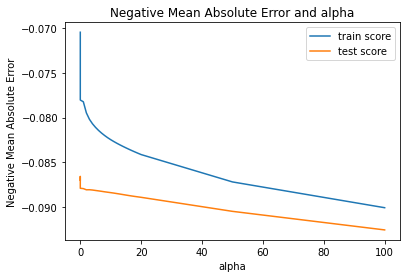

In [ ]:

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**Observation**

From the above graph, we can conclude that after the alpha value 10, both train and test score started decreasing, So we can choose 10 as alpha value for further calculation

In [ ]:
ridge = Ridge(alpha=10)

ridge.fit(X_train_rfe, y_train)
print("Intercept: ", ridge.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",ridge.coef_)

Intercept:  11.673537902362346
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.05522612  0.09717006  0.05839106  0.03389342  0.02290526  0.05780048
  0.13670732  0.04369361 -0.09390103  0.07232471  0.0458313   0.06896922
  0.03642589  0.02744155 -0.02629997 -0.00642809  0.0305899  -0.03749435
  0.08175801 -0.09252979 -0.06218909 -0.05158096 -0.01113251 -0.06171132
 -0.03889439 -0.06171024  0.05690646 -0.05025775 -0.0461793   0.04400504
 -0.02302552  0.00230542  0.07457722  0.02758261 -0.00249366 -0.03725407
  0.01456901  0.00296768  0.02768447 -0.0133671   0.02324822 -0.10099634
 -0.01829399  0.01102633  0.02693045  0.01617972  0.0231468   0.02584015
  0.04583713  0.01845304  0.01036375 -0.00333386  0.02040114  0.01230951
  0.0594506  -0.02958334  0.07532338  0.02060533 -0.02211533  0.03295136
  0.01501946 -0.01708394 -0.01750344 -0.00169816 -0.02949579  0.02135668
  0.03268008 -0.03090167 -0.03168237  0.05508207 -0.02344746

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_ridge = ridge.predict(X_train_rfe)
y_pred_test_ridge= ridge.predict(X_test_rfe)

##R2 score for Ridge Regression Model
r2_score_train = r2_score(y_train,y_pred_train_ridge)
r2_score_test = r2_score(y_test, y_pred_test_ridge)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train_ridge)
MSE_test = mean_squared_error(y_test, y_pred_test_ridge)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train_ridge)
MAE_test = mean_absolute_error(y_test, y_pred_test_ridge)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_ridge=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_ridge':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_ridge':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_ridge))

The model evaluation
+----------+-------------+------------+
|  score   | Train_ridge | Test_ridge |
+----------+-------------+------------+
| r2_score |    0.9003   |   0.8946   |
|   MSE    |    0.0157   |   0.0173   |
|   MAE    |    0.0826   |   0.0889   |
|   RMSE   |    0.1252   |   0.1317   |
+----------+-------------+------------+


**Observation**



*   From the above model we can conclude, the Ridge regression model reduces the overfit.

### Error Distribution

In [ ]:
res_train= y_train - y_pred_train_ridge
res_test= y_test - y_pred_test_ridge

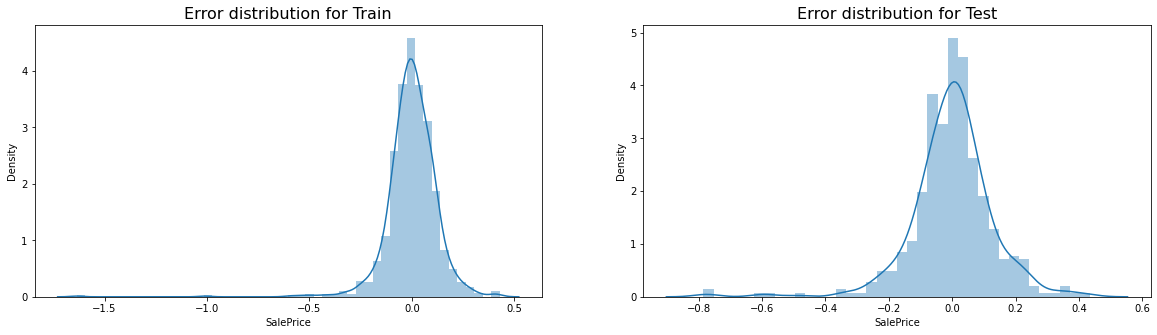

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(res_train)
plt.title('Error distribution for Train',fontsize = 16)

plt.subplot(1, 2, 2)
sns.distplot(res_test)
plt.title('Error distribution for Test',fontsize = 16)

plt.show()

**Observation**

* The residuals terms are normally distributed and have a mean value of zero for both train and test data

###  Homoscedasticity

Text(0, 0.5, 'res_test')

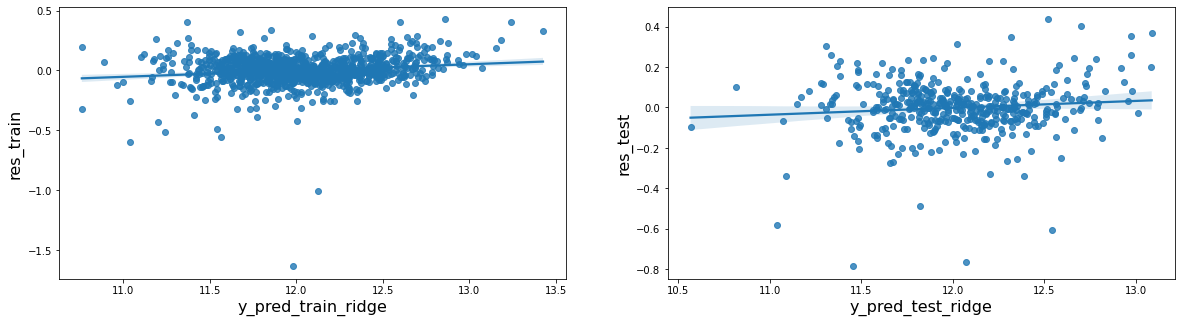

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.regplot(y_pred_train,res_train) 
plt.xlabel('y_pred_train_ridge',fontsize = 16)                       
plt.ylabel('res_train',fontsize = 16)

plt.subplot(1, 2, 2)
sns.regplot(y_pred_test,res_test) 
plt.xlabel('y_pred_test_ridge',fontsize = 16)                       
plt.ylabel('res_test',fontsize = 16)


**Observation**


* The residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can see that there is not any pattern in the error terms

### Top 15 important features in case of Ridge regression as per the coefficient values

In [ ]:
top_feature_r=pd.DataFrame({'Features_ridge':X_train_rfe.columns,'Coefficient_ridge':abs(ridge.coef_)})

top_feature_r=top_feature_r.sort_values(by='Coefficient_ridge', ascending=False)
top_feature_r.head(15)

,Features_ridge,Coefficient_ridge
6,GrLivArea,0.136707
41,Condition2_PosN,0.100996
1,OverallQual,0.097170
8,AgeofProperty,0.093901
19,Neighborhood_Edwards,0.092530
18,Neighborhood_Crawfor,0.081758
56,Exterior1st_BrkFace,0.075323
32,Condition1_Norm,0.074577
9,MSZoning_FV,0.072325
11,MSZoning_RL,0.068969


# **Bulding model with Lasso Regression**

In [ ]:
params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=1]
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015755,0.002451,0.004095,0.000152,0.00001,{'alpha': 1e-05},-0.080926,-0.093332,-0.089432,-0.091803,-0.078334,-0.086765,0.006013,2,-0.070889,-0.070577,-0.070135,-0.070777,-0.070566,-0.070589,0.000258
1,0.014433,0.003134,0.003995,0.000057,0.0001,{'alpha': 0.0001},-0.080088,-0.093051,-0.090323,-0.089254,-0.077417,-0.086027,0.006125,1,-0.073490,-0.070972,-0.072368,-0.073092,-0.073331,-0.072651,0.000923
2,0.018663,0.005972,0.009737,0.004299,0.0002,{'alpha': 0.0002},-0.081704,-0.093359,-0.093383,-0.088542,-0.080436,-0.087485,0.005541,3,-0.078376,-0.071969,-0.076577,-0.076893,-0.078200,-0.076403,0.002326
3,0.009267,0.002661,0.003943,0.000250,0.0003,{'alpha': 0.0003},-0.083816,-0.093778,-0.095720,-0.088224,-0.083961,-0.089100,0.004915,4,-0.082293,-0.073221,-0.079886,-0.081071,-0.082147,-0.079724,0.003365
4,0.009400,0.002713,0.003829,0.000050,0.0005,{'alpha': 0.0005},-0.083545,-0.095309,-0.095550,-0.087739,-0.084826,-0.089394,0.005113,5,-0.084857,-0.075537,-0.081345,-0.083476,-0.084306,-0.081904,0.003400


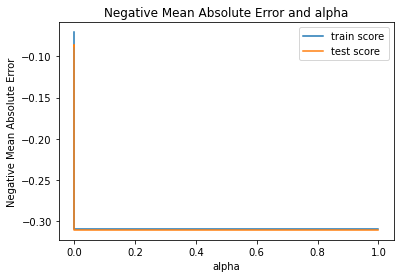

In [ ]:

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

**Observation**

From the above graph we can see that the train Error and test error are quite low at alpha close to 0 and stabilises so that we can choose alpha value low close to 0


In [ ]:
lasso = Lasso(alpha=0.001)

lasso.fit(X_train_rfe, y_train)
print("Intercept: ", lasso.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",lasso.coef_)

Intercept:  11.795478049421478
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.0513205   0.1031158   0.05911355  0.03291887  0.0240985   0.05069496
  0.13869189  0.04334156 -0.09181176  0.06519669  0.          0.05345391
  0.          0.00562729 -0.         -0.          0.01910848 -0.00885312
  0.08944109 -0.07504687 -0.02976183 -0.03783541 -0.         -0.02612212
 -0.01765756 -0.03528442  0.06469436 -0.02210742 -0.01314075  0.01601792
 -0.          0.          0.07323639  0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.0905248
 -0.          0.          0.02160645  0.          0.          0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.          0.06628093  0.         -0.          0.02258368
  0.         -0.         -0.         -0.         -0.          0.
  0.         -0.         -0.          0.03537828 -0.          0.
  0.          0.          0.

**Observation**

In this case we observed most of the weights of the features which is not important became zero. So we can conclude, Lasso regression will help to reduce the number of features .

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_lasso = lasso.predict(X_train_rfe)
y_pred_test_lasso= lasso.predict(X_test_rfe)

##R2 score for Ridge Regression Model
r2_score_train = r2_score(y_train,y_pred_train_lasso)
r2_score_test = r2_score(y_test, y_pred_test_lasso)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train_lasso)
MSE_test = mean_squared_error(y_test, y_pred_test_lasso)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train_lasso)
MAE_test = mean_absolute_error(y_test, y_pred_test_lasso)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_lasso=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_lasso':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_lasso':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_lasso))

The model evaluation
+----------+-------------+------------+
|  score   | Train_lasso | Test_lasso |
+----------+-------------+------------+
| r2_score |    0.8918   |   0.8924   |
|   MSE    |    0.017    |   0.0177   |
|   MAE    |    0.0858   |   0.0896   |
|   RMSE   |    0.1304   |   0.133    |
+----------+-------------+------------+


**Observation**



*   From the above model we can conclude, the lasso regression model reduces the overfit .

### Error Distribution

In [ ]:
res_train= y_train - y_pred_train_lasso
res_test= y_test - y_pred_test_lasso

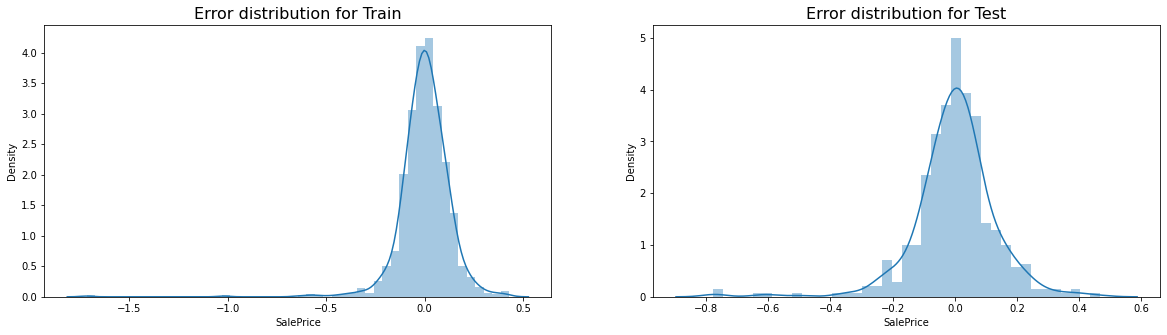

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(res_train)
plt.title('Error distribution for Train',fontsize = 16)

plt.subplot(1, 2, 2)
sns.distplot(res_test)
plt.title('Error distribution for Test',fontsize = 16)

plt.show()

**Observation**

* The residuals terms are normally distributed and have a mean value of zero for both train and test data

###  Homoscedasticity

Text(0, 0.5, 'res_test')

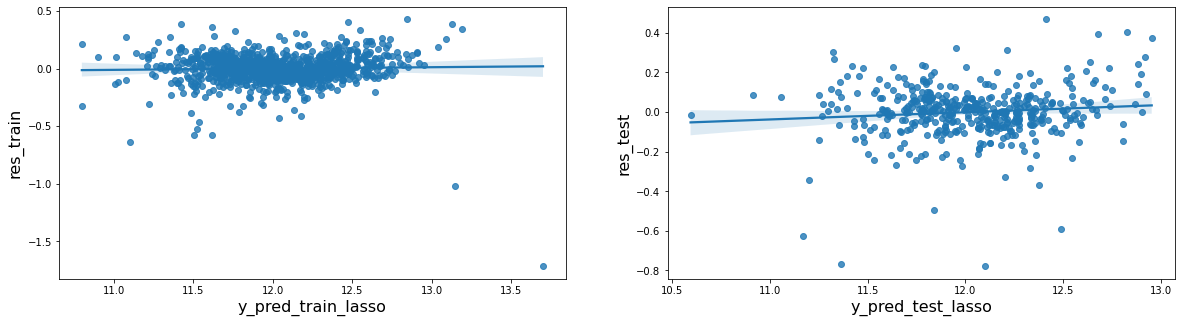

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.regplot(y_pred_train_lasso,res_train) 
plt.xlabel('y_pred_train_lasso',fontsize = 16)                       
plt.ylabel('res_train',fontsize = 16)

plt.subplot(1, 2, 2)
sns.regplot(y_pred_test_lasso,res_test) 
plt.xlabel('y_pred_test_lasso',fontsize = 16)                       
plt.ylabel('res_test',fontsize = 16)


**Observation**


* The residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can see that there is not any pattern in the error terms

### Top 15 important features in case of Lasso regression as per the coefficient values

In [ ]:
top_feature_l=pd.DataFrame({'Features_lasso':X_train_rfe.columns,'Coefficient_lasso':abs(lasso.coef_)})

top_feature_l=top_feature_l.sort_values(by='Coefficient_lasso', ascending=False)
top_feature_l.head(15)

,Features_lasso,Coefficient_lasso
6,GrLivArea,0.138692
1,OverallQual,0.103116
8,AgeofProperty,0.091812
41,Condition2_PosN,0.090525
18,Neighborhood_Crawfor,0.089441
19,Neighborhood_Edwards,0.075047
32,Condition1_Norm,0.073236
56,Exterior1st_BrkFace,0.066281
9,MSZoning_FV,0.065197
26,Neighborhood_NridgHt,0.064694


#**Comparison between different models**

In [ ]:
df_result=pd.merge(df_score_linear,df_score_ridge,on='score')
df_result=pd.merge(df_result,df_score_lasso,on='score')
print(datadisplay(df_result))

+----------+--------------+-------------+-------------+------------+-------------+------------+
|  score   | Train_linear | Test_linear | Train_ridge | Test_ridge | Train_lasso | Test_lasso |
+----------+--------------+-------------+-------------+------------+-------------+------------+
| r2_score |    0.9391    |    0.8724   |    0.9003   |   0.8946   |    0.8918   |   0.8924   |
|   MSE    |    0.0096    |    0.021    |    0.0157   |   0.0173   |    0.017    |   0.0177   |
|   MAE    |    0.0714    |    0.0919   |    0.0826   |   0.0889   |    0.0858   |   0.0896   |
|   RMSE   |    0.0978    |    0.1449   |    0.1252   |   0.1317   |    0.1304   |   0.133    |
+----------+--------------+-------------+-------------+------------+-------------+------------+


**Observation**


* From the above comparison we can conclude, both ridge and lasso will give better result than linear regression with out regularization.



*   The best alpha value for Ridge is-10
*   The best alpha value for Lasso is-0.001



#**Comparison between feature importance of top 15 features in case of different models**

In [ ]:
top_feature=pd.DataFrame({'Features_linear':top_feature_lr['Features_linear'].values,'Coefficient_linear':top_feature_lr['Coefficient_linear'].values,
                          'Features_ridge':top_feature_r['Features_ridge'].values,'Coefficient_ridge':top_feature_r['Coefficient_ridge'].values,
                          'Features_lasso':top_feature_l['Features_lasso'].values,'Coefficient_lasso':top_feature_l['Coefficient_lasso'].values})

In [ ]:
top_feature.head(15)

,Features_linear,Coefficient_linear,Features_ridge,Coefficient_ridge,Features_lasso,Coefficient_lasso
0,RoofMatl_Membran,2.679599,GrLivArea,0.136707,GrLivArea,0.138692
1,RoofMatl_Tar&Grv,2.517859,Condition2_PosN,0.100996,OverallQual,0.103116
2,RoofMatl_WdShngl,2.509681,OverallQual,0.097170,AgeofProperty,0.091812
3,RoofMatl_Metal,2.498855,AgeofProperty,0.093901,Condition2_PosN,0.090525
4,RoofMatl_CompShg,2.390170,Neighborhood_Edwards,0.092530,Neighborhood_Crawfor,0.089441
5,RoofMatl_WdShake,2.350543,Neighborhood_Crawfor,0.081758,Neighborhood_Edwards,0.075047
6,RoofMatl_Roll,2.296738,Exterior1st_BrkFace,0.075323,Condition1_Norm,0.073236
7,Condition2_PosN,1.469581,Condition1_Norm,0.074577,Exterior1st_BrkFace,0.066281
8,Functional_Sev,0.436428,MSZoning_FV,0.072325,MSZoning_FV,0.065197
9,Condition2_PosA,0.320865,MSZoning_RL,0.068969,Neighborhood_NridgHt,0.064694


# **Answer Questen 1**

# Ridge regression with double the alpha value

In [ ]:
ridge = Ridge(alpha=20)

ridge.fit(X_train_rfe, y_train)
print("Intercept: ", ridge.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",ridge.coef_)

Intercept:  11.740663056907788
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.05358758  0.10158543  0.05824354  0.03317447  0.02490169  0.05166615
  0.13488477  0.04518861 -0.09186088  0.05948966  0.02822566  0.05904091
  0.02216342  0.0239125  -0.02048749 -0.00301373  0.02592083 -0.02654758
  0.0709244  -0.07652988 -0.04445096 -0.04333951 -0.00575552 -0.04397743
 -0.02787797 -0.04572626  0.05347805 -0.03663618 -0.03289433  0.03201203
 -0.01389327 -0.00188789  0.06797174  0.01572784 -0.00569951 -0.02894247
  0.00824486  0.00076629  0.01349406 -0.00744024  0.01114919 -0.05345406
 -0.00982669  0.00559026  0.02673727  0.00972763  0.01375461  0.01423806
  0.0278702   0.00839367  0.00525483 -0.00262003  0.00742979  0.00503574
  0.03236167 -0.01814888  0.05965167  0.01651408 -0.01824911  0.03044186
  0.00759129 -0.00917789 -0.01005487 -0.00074943 -0.01837521  0.01087947
  0.01999114 -0.02300632 -0.01774009  0.04332093 -0.01938623

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_ridge = ridge.predict(X_train_rfe)
y_pred_test_ridge= ridge.predict(X_test_rfe)

##R2 score for Ridge Regression Model
r2_score_train = r2_score(y_train,y_pred_train_ridge)
r2_score_test = r2_score(y_test, y_pred_test_ridge)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train_ridge)
MSE_test = mean_squared_error(y_test, y_pred_test_ridge)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train_ridge)
MAE_test = mean_absolute_error(y_test, y_pred_test_ridge)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_ridge=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_ridge':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_ridge':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_ridge))

The model evaluation
+----------+-------------+------------+
|  score   | Train_ridge | Test_ridge |
+----------+-------------+------------+
| r2_score |    0.8957   |   0.8939   |
|   MSE    |    0.0164   |   0.0175   |
|   MAE    |    0.084    |   0.089    |
|   RMSE   |    0.128    |   0.1321   |
+----------+-------------+------------+


### Top 15 important features in case of Ridge regression as per the coefficient values

In [ ]:
top_feature_r=pd.DataFrame({'Features_ridge':X_train_rfe.columns,'Coefficient_ridge':abs(ridge.coef_)})

top_feature_r=top_feature_r.sort_values(by='Coefficient_ridge', ascending=False)
top_feature_r.head(15)

,Features_ridge,Coefficient_ridge
6,GrLivArea,0.134885
1,OverallQual,0.101585
8,AgeofProperty,0.091861
19,Neighborhood_Edwards,0.076530
18,Neighborhood_Crawfor,0.070924
32,Condition1_Norm,0.067972
56,Exterior1st_BrkFace,0.059652
9,MSZoning_FV,0.059490
11,MSZoning_RL,0.059041
2,OverallCond,0.058244


# Lasso regression with double the alpha value

In [ ]:
lasso = Lasso(alpha=0.002)

lasso.fit(X_train_rfe, y_train)
print("Intercept: ", lasso.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",lasso.coef_)

Intercept:  11.867935065258319
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.04820613  0.11342352  0.05922414  0.0309351   0.02689249  0.03496195
  0.13471798  0.04575324 -0.0952115   0.03000022  0.          0.03451798
  0.          0.         -0.          0.          0.         -0.
  0.07028142 -0.0480995  -0.         -0.00580046  0.         -0.
 -0.         -0.00358006  0.05129313 -0.         -0.          0.
 -0.         -0.          0.06649796  0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.00734095  0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
  0.         -0.          0.02920804  0.         -0.          0.01423336
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.0140471  -0.          0.
  0.          0.          0.          0.02879697  0.       

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_lasso = lasso.predict(X_train_rfe)
y_pred_test_lasso= lasso.predict(X_test_rfe)

##R2 score for Ridge Regression Model
r2_score_train = r2_score(y_train,y_pred_train_lasso)
r2_score_test = r2_score(y_test, y_pred_test_lasso)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train_lasso)
MSE_test = mean_squared_error(y_test, y_pred_test_lasso)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train_lasso)
MAE_test = mean_absolute_error(y_test, y_pred_test_lasso)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_lasso=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_lasso':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_lasso':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_lasso))

The model evaluation
+----------+-------------+------------+
|  score   | Train_lasso | Test_lasso |
+----------+-------------+------------+
| r2_score |    0.882    |   0.8858   |
|   MSE    |    0.0186   |   0.0188   |
|   MAE    |    0.0897   |   0.0923   |
|   RMSE   |    0.1362   |   0.1371   |
+----------+-------------+------------+


### Top 15 important features in case of lasso regression as per the coefficient values

In [ ]:
top_feature_l=pd.DataFrame({'Features_lasso':X_train_rfe.columns,'Coefficient_lasso':abs(lasso.coef_)})

top_feature_l=top_feature_l.sort_values(by='Coefficient_lasso', ascending=False)
top_feature_l.head(15)

,Features_lasso,Coefficient_lasso
6,GrLivArea,0.134718
1,OverallQual,0.113424
8,AgeofProperty,0.095212
18,Neighborhood_Crawfor,0.070281
32,Condition1_Norm,0.066498
2,OverallCond,0.059224
26,Neighborhood_NridgHt,0.051293
0,LotArea,0.048206
19,Neighborhood_Edwards,0.048100
7,GarageCars,0.045753


# **Answer Questen 3**

In [ ]:
X_train_new=X_train.copy()
X_test_new=X_test.copy()

In [ ]:
top_5_feature_lasso=top_feature_l['Features_lasso'].values[0:5]

In [ ]:
top_5_feature_lasso

array(['GrLivArea', 'OverallQual', 'AgeofProperty', 'Condition2_PosN',
       'Neighborhood_Crawfor'], dtype=object)

###create another dataset excluding the five most important predictor variables

In [ ]:
X_train_lasso=X_train_new.drop(top_5_feature_lasso,axis=1)
X_test_lasso=X_test_new.drop(top_5_feature_lasso,axis=1)

## **Recursive Feature Elimination**

In [ ]:
# Selecting top 100 feature using RFE

lr_rfe=LinearRegression()
lr_rfe.fit(X_train_lasso,y_train)

rfe = RFE(lr_rfe,n_features_to_select=80)             
rfe = rfe.fit(X_train_lasso, y_train)

### Columns selected by RFE and their weights

In [ ]:
list(zip(X_train_lasso.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 66),
 ('LotFrontage', False, 49),
 ('LotArea', False, 7),
 ('LotShape', False, 74),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 83),
 ('ExterCond', False, 58),
 ('BsmtQual', False, 23),
 ('BsmtCond', False, 18),
 ('BsmtExposure', False, 42),
 ('BsmtFinType1', False, 64),
 ('BsmtFinSF1', False, 36),
 ('BsmtFinType2', False, 69),
 ('BsmtUnfSF', False, 70),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 47),
 ('CentralAir', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 68),
 ('BsmtFullBath', False, 17),
 ('BsmtHalfBath', False, 77),
 ('FullBath', False, 31),
 ('HalfBath', False, 45),
 ('BedroomAbvGr', False, 57),
 ('KitchenAbvGr', False, 56),
 ('Fireplaces', False, 12),
 ('GarageFinish', False, 40),
 ('GarageCars', True, 1),
 ('GarageQual', False, 71),
 ('WoodDeckSF', False, 52),
 ('OpenPorchSF', False, 59),
 ('EnclosedPorch', False, 81),
 ('3SsnPorch', False, 53),
 ('ScreenPorch', False, 55),
 ('PoolArea', False, 62),
 ('MiscVal', False, 79),
 

### Columns selected by RFE

In [ ]:
col=X_train_lasso.columns[rfe.support_]
col

Index(['OverallCond', 'TotalBsmtSF', 'CentralAir', '2ndFlrSF', 'GarageCars',
       'Utilities_NoSeWa', 'LotConfig_FR3', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_2.5Fin', 'HouseStyle_SLvl',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_Br

### Columns not selected by RFE

In [ ]:
col_not=X_train_lasso.columns[~rfe.support_]
col_not

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'MasVnrArea',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageFinish', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Remodelled',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside',
       'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_NoRidge',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_2fmCon', 'B

### Creating X_train,X_test dataframe with RFE selected variable

In [ ]:
X_train_rfe_new = X_train_lasso[col]
X_test_rfe_new = X_test_lasso[col]

# **Bulding model with Lasso Regression**

In [ ]:
params = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_rfe_new, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=1]
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045318,0.027115,0.007952,0.003874,0.00001,{'alpha': 1e-05},-0.113293,-0.125065,-0.119547,-0.125388,-0.123545,-0.121368,0.004541,2,-0.102796,-0.104626,-0.101077,-0.102130,-0.100706,-0.102267,0.001394
1,0.041853,0.002193,0.008576,0.000319,0.0001,{'alpha': 0.0001},-0.113189,-0.124469,-0.118955,-0.125901,-0.123695,-0.121242,0.004652,1,-0.106247,-0.105795,-0.103953,-0.104554,-0.104583,-0.105026,0.000855
2,0.032372,0.004320,0.008952,0.000338,0.0002,{'alpha': 0.0002},-0.114853,-0.124564,-0.118944,-0.125862,-0.125376,-0.121920,0.004319,3,-0.111254,-0.107011,-0.108014,-0.107814,-0.109655,-0.108750,0.001518
3,0.022580,0.001964,0.008962,0.001083,0.0003,{'alpha': 0.0003},-0.116618,-0.125381,-0.120415,-0.126616,-0.128714,-0.123549,0.004411,4,-0.115025,-0.108155,-0.111797,-0.111353,-0.113277,-0.111921,0.002280
4,0.019850,0.002694,0.008790,0.002509,0.0005,{'alpha': 0.0005},-0.116871,-0.127387,-0.120448,-0.127998,-0.128197,-0.124180,0.004655,5,-0.117864,-0.109908,-0.114403,-0.114577,-0.115547,-0.114460,0.002588


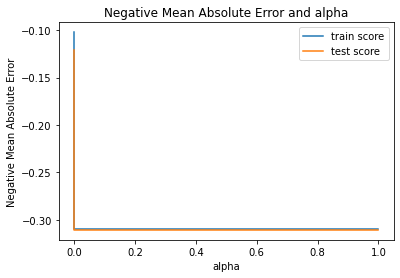

In [ ]:

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
lasso = Lasso(alpha=0.001)

lasso.fit(X_train_rfe_new, y_train)
print("Intercept: ", lasso.intercept_)
print('------------------------------------------------------------------------------------------')
print("Coefficients:\n",lasso.coef_)

Intercept:  11.823643985931648
------------------------------------------------------------------------------------------
Coefficients:
 [ 0.05502331  0.15556875  0.10285495  0.12195308  0.09495508 -0.
 -0.         -0.         -0.18137322 -0.13413704  0.         -0.01476405
 -0.18482797 -0.01914864 -0.27083415 -0.26513335 -0.08890067 -0.14034026
 -0.0698118  -0.07659386  0.14060812 -0.25566872 -0.03571254 -0.13957151
 -0.          0.09933446  0.         -0.          0.06757497  0.
 -0.         -0.          0.         -0.          0.05490535 -0.
  0.          0.         -0.          0.          0.          0.02430708
  0.         -0.          0.12766599  0.         -0.0231967   0.
 -0.          0.          0.         -0.          0.0229257  -0.01310121
  0.          0.         -0.00348894  0.02577383  0.0264233   0.
 -0.         -0.          0.         -0.         -0.          0.11566724
  0.03025653  0.06740786 -0.         -0.02957541  0.          0.
  0.04769874 -0.          0.0826915

In [ ]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_lasso = lasso.predict(X_train_rfe_new)
y_pred_test_lasso= lasso.predict(X_test_rfe_new)

##R2 score for Ridge Regression Model
r2_score_train = r2_score(y_train,y_pred_train_lasso)
r2_score_test = r2_score(y_test, y_pred_test_lasso)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_train = mean_squared_error(y_train, y_pred_train_lasso)
MSE_test = mean_squared_error(y_test, y_pred_test_lasso)

##Mean Absolute error for train and test sets
MAE_train = mean_absolute_error(y_train, y_pred_train_lasso)
MAE_test = mean_absolute_error(y_test, y_pred_test_lasso)

##Root Mean Squared Error for Train and Test Sets
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)

df_score_lasso=pd.DataFrame({'score':['r2_score','MSE','MAE','RMSE'],
                       'Train_lasso':[round(r2_score_train,4),round(MSE_train,4),round(MAE_train,4),round(RMSE_train,4)],
                       'Test_lasso':[round(r2_score_test,4),round(MSE_test,4),round(MAE_test,4),round(RMSE_test,4)]})
print('The model evaluation')
print(datadisplay(df_score_lasso))

The model evaluation
+----------+-------------+------------+
|  score   | Train_lasso | Test_lasso |
+----------+-------------+------------+
| r2_score |    0.8191   |   0.8258   |
|   MSE    |    0.0284   |   0.0287   |
|   MAE    |    0.1202   |   0.1209   |
|   RMSE   |    0.1686   |   0.1693   |
+----------+-------------+------------+


### Top 15 important features in case of Lasso regression as per the coefficient values

In [ ]:
top_feature_l_new=pd.DataFrame({'Features_lasso':X_train_rfe_new.columns,'Coefficient_lasso':abs(lasso.coef_)})

top_feature_l_new=top_feature_l_new.sort_values(by='Coefficient_lasso', ascending=False)
top_feature_l_new.head(15)

,Features_lasso,Coefficient_lasso
14,Neighborhood_IDOTRR,0.270834
15,Neighborhood_MeadowV,0.265133
21,Neighborhood_OldTown,0.255669
12,Neighborhood_Edwards,0.184828
8,Neighborhood_BrDale,0.181373
1,TotalBsmtSF,0.155569
20,Neighborhood_NridgHt,0.140608
17,Neighborhood_NAmes,0.140340
23,Neighborhood_Sawyer,0.139572
9,Neighborhood_BrkSide,0.134137


In [ ]:
top_feature_l_new['Features_lasso'].values[0:5]

array(['Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_OldTown', 'Neighborhood_Edwards',
       'Neighborhood_BrDale'], dtype=object)